Load Data source

https://techassessment.blob.core.windows.net/aiap-pys-2/noshow.db


In [ ]:
# download ad import the data
import requests

url = "https://techassessment.blob.core.windows.net/aiap-pys-2/noshow.db"
file_path = "data/noshow.db"

# Download the database
response = requests.get(url)

# Save it as a local db file content
with open(file_path, "wb") as file:
    file.write(response.content)
	
print(f"Database downloaded to {file_path}")


In [1]:
import sqlite3
import pandas as pd

# Connect to the database and load the db file that we saved
db_path = 'data/noshow.db'  # Ensure the file path is correct
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
try:
    # List all tables in the database
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    print("Tables in the database:", tables)

    # Load the `noshow` table into a DataFrame
    query = "SELECT * FROM noshow"
    data = pd.read_sql_query(query, conn)

    # Display the first few rows of the table
    # print(data.head())

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    
	# Perform a SELECT query

	# Fetch and print the results
    rows = cursor.fetchall()
    for row in rows:
	    print(row)

    # Close the connection
    conn.close()

Tables in the database:      name
0  noshow


EDA
From This point onwards, we will be doing Explorartory Data Analysis.

In [2]:
# Get the concise summary of a DataFrame.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB
None


In [3]:
# descriptive statistics
print(data.describe())
print(data.head())

          booking_id        no_show    arrival_day   checkout_day  \
count  119391.000000  119390.000000  119390.000000  119390.000000   
mean    59695.000000       0.370416      15.798241      14.250507   
std     34465.357332       0.482918       8.780829      11.063697   
min         0.000000       0.000000       1.000000     -31.000000   
25%     29847.500000       0.000000       8.000000       7.000000   
50%     59695.000000       0.000000      16.000000      15.000000   
75%     89542.500000       1.000000      23.000000      23.000000   
max    119390.000000       1.000000      31.000000      31.000000   

        num_children  
count  119390.000000  
mean        0.871229  
std         0.779796  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         3.000000  
   booking_id  no_show   branch booking_month arrival_month  arrival_day  \
0       94113      0.0   Changi      November          June         25.0   
1       86543      

In [4]:
# check for the number of nulls
print(data.isnull().sum())

num_rows = data.shape[0]
print(f"Number of rows: {num_rows}")

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64
Number of rows: 119391


Check the unique values of all the columns

In [5]:
# Loop through each column and print unique values
columns_to_check = [
    "no_show",'branch', 'booking_month', 'arrival_month', 'arrival_day', 'checkout_month', 'checkout_day',
    'country', 'first_time', 'room', 'price', 'platform', 'num_adults', 'num_children'
]


for col in columns_to_check:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}':", unique_values)
    print(f"Number of unique values in '{col}':", len(unique_values))
    print()
    print("-" * 50)


Unique values in 'no_show': [ 0.  1. nan]
Number of unique values in 'no_show': 3

--------------------------------------------------
Unique values in 'branch': ['Changi' 'Orchard' None]
Number of unique values in 'branch': 3

--------------------------------------------------
Unique values in 'booking_month': ['November' 'August' 'March' 'September' 'July' 'January' 'October' 'June'
 'December' 'April' 'May' 'February' None]
Number of unique values in 'booking_month': 13

--------------------------------------------------
Unique values in 'arrival_month': ['June' 'November' 'February' 'October' 'September' 'March' 'May' 'August'
 'July' 'January' 'April' 'December' 'ApRiL' 'OcTobeR' 'JuNe' 'JulY'
 'ApriL' 'OctOber' 'DecembEr' 'SeptEmber' 'JanUary' 'JUne' 'FeBruary'
 'JanuarY' 'DEcember' 'SePtember' 'DecembeR' 'MaY' 'NoVember' 'JUly'
 'JunE' 'JuLy' 'FebrUary' 'NOvember' 'SeptemBer' 'OctobeR' 'DecemBer'
 'MarCh' 'AuguSt' 'AugusT' 'APril' 'SepTember' 'NovembEr' 'FEbruary'
 'DeceMber' 'Au

In [6]:
# Check the No show column
# # Check unique values in the 'no_show' column
unique_values = data['no_show'].unique()
print("Unique values in 'no_show':", unique_values)
print()
# # Verify if all values are 0.0 or 1.0
# valid_values = {0.0, 1.0}
# if set(unique_values).issubset(valid_values):
#     print("All values in 'no_show' are either 0.0 or 1.0.")
# else:
#     print("There are other values in 'no_show':", set(unique_values) - valid_values)

# print(data['no_show'].value_counts(normalize=True))
print(data['no_show'].value_counts())


Unique values in 'no_show': [ 0.  1. nan]

no_show
0.0    75166
1.0    44224
Name: count, dtype: int64


In [7]:
# Branch
print("Unique values in 'branch':", data['branch'].unique())
print()
print(data['branch'].value_counts())


Unique values in 'branch': ['Changi' 'Orchard' None]

branch
Changi     79330
Orchard    40060
Name: count, dtype: int64


In [8]:
#booking_month
# print(data['booking_month'].unique())
data['booking_month'] = data['booking_month'].str.lower()
print(data['booking_month'].unique())
print()
print(data['booking_month'].nunique())
print()
print(data['booking_month'].value_counts())


['november' 'august' 'march' 'september' 'july' 'january' 'october' 'june'
 'december' 'april' 'may' 'february' None]

12

booking_month
june         10324
september    10315
november     10280
january      10214
august       10134
october      10068
july          9993
march         9754
may           9588
february      9588
april         9571
december      9561
Name: count, dtype: int64


In [9]:
#Arrival_month
# Issue: inconsistent data entry with random capitalisation
# # Standardize the arrival_month column
data['arrival_month'] = data['arrival_month'].str.lower()

# We commented this out for now as we want to see the final result based on the number of missing rows
# Handle missing values by filling with the mode (most frequent month)
# most_frequent_month = data['booking_month'].mode()[0]
# data['arrival_month'] = data['arrival_month'].fillna(most_frequent_month)

# Verify the cleaned column
print("Unique values in 'arrival_month':", data['arrival_month'].unique())
print()
print("Number of unique values in 'arrival_month':", data['arrival_month'].nunique())
print()
print(data['arrival_month'].value_counts())

#Note! March is missing

Unique values in 'arrival_month': ['june' 'november' 'february' 'october' 'september' 'march' 'may' 'august'
 'july' 'january' 'april' 'december' None]

Number of unique values in 'arrival_month': 12

arrival_month
august       13877
july         12661
may          11791
october      11160
april        11089
june         10939
september    10508
march         9794
february      8068
november      6794
december      6780
january       5929
Name: count, dtype: int64


In [10]:
#arrival_day
# Issue: Day of the month being negative.
# Assumption: We believe that the negative sign is added incorrectly.
# Therefore, we remove the negative sign

# Assume that the negative sign is added incorrectly. 
# Convert negative values to positive
data['checkout_day'] = data['checkout_day'].apply(lambda x: abs(x) if x < 0 else x)

# Verify the updated column
print("Unique values in 'checkout_day':", data['checkout_day'].unique())

Unique values in 'checkout_day': [27. 29. 11.  3. 24. 13. 16. 19. 28. 10. 12. 15. 23. 31. 25. 17.  8.  2.
  9.  7.  1. 20. 14.  4.  6. 21.  5. 18. 22. 30. 26. nan]


In [11]:
# checkout_month
print("Unique values in 'arrival_month':", data['checkout_month'].unique())
print()
print("Number of unique values in 'arrival_month':", data['checkout_month'].nunique())
print()
print(data['checkout_month'].value_counts())



Unique values in 'arrival_month': ['June' 'November' 'February' 'October' 'September' 'March' 'May' 'August'
 'July' 'January' 'April' 'December' None]

Number of unique values in 'arrival_month': 12

checkout_month
August       13836
July         12760
May          12044
October      11434
April        11016
June         10692
September    10416
March         9509
February      7716
November      7214
January       6516
December      6237
Name: count, dtype: int64


In [12]:
# checkout_day
print("Unique values in 'arrival_month':", data['checkout_day'].unique())
print()
print("Number of unique values in 'arrival_month':", data['checkout_day'].nunique())
print()
print(data['checkout_day'].value_counts())



Unique values in 'arrival_month': [27. 29. 11.  3. 24. 13. 16. 19. 28. 10. 12. 15. 23. 31. 25. 17.  8.  2.
  9.  7.  1. 20. 14.  4.  6. 21.  5. 18. 22. 30. 26. nan]

Number of unique values in 'arrival_month': 31

checkout_day
11.0    4656
18.0    4468
20.0    4434
27.0    4221
4.0     4175
6.0     4147
17.0    4139
28.0    4116
1.0     4071
25.0    3992
19.0    3991
14.0    3983
22.0    3970
21.0    3937
29.0    3881
7.0     3874
26.0    3815
3.0     3794
16.0    3789
5.0     3786
15.0    3763
8.0     3722
10.0    3692
24.0    3675
13.0    3651
2.0     3647
9.0     3639
23.0    3469
12.0    3465
30.0    3262
31.0    2166
Name: count, dtype: int64


In [13]:
#country
print("Unique values in 'arrival_month':", data['country'].unique())
print()
print("Number of unique values in 'arrival_month':", data['country'].nunique())
print()
print(data['country'].value_counts())





Unique values in 'arrival_month': ['Singapore' 'Indonesia' 'India' 'China' 'Australia' 'Japan' 'Malaysia'
 None]

Number of unique values in 'arrival_month': 7

country
China        48590
Indonesia    25812
India        15790
Australia    12129
Japan         9391
Singapore     3912
Malaysia      3766
Name: count, dtype: int64


In [14]:
#first_time
print("Unique values in 'arrival_month':", data['first_time'].unique())
print()
print("Number of unique values in 'arrival_month':", data['first_time'].nunique())
print()
print(data['first_time'].value_counts())



Unique values in 'arrival_month': ['Yes' 'No' None]

Number of unique values in 'arrival_month': 2

first_time
Yes    115580
No       3810
Name: count, dtype: int64


In [15]:
#room
print("Unique values in 'arrival_month':", data['room'].unique())
print()
print("Number of unique values in 'arrival_month':", data['room'].nunique())
print()
print(data['room'].value_counts())

Unique values in 'arrival_month': ['Single' 'King' 'Queen' None 'President Suite']

Number of unique values in 'arrival_month': 4

room
King               70496
Single             15697
Queen              10824
President Suite      761
Name: count, dtype: int64


In [16]:
print(data.isnull().sum())


booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64


In [17]:
#price
# Clean the data for price
print(data['price'].head())

# Fill missing numeric values with the median
# data['price'] = data['price'].fillna(data['price'].median())

# Define a function to process the price column
def clean_price(price):
    if pd.isna(price):  # Handle missing values
        return None
    if 'USD$' in price:  # If price is in USD
        numeric_value = float(price.replace('USD$', '').strip())
        return numeric_value * 1.3  # Convert to SGD
    elif 'SGD$' in price:  # If price is in SGD
        return float(price.replace('SGD$', '').strip())
    else:
        return None  # Handle unexpected formats

# Apply the function to the 'price' column
# this causes error
data['price'] = data['price'].apply(clean_price)

# Fill missing values with the median
# data['price'] = data['price'].fillna(data['price'].median())

# Display the cleaned price column
print(data['price'].head())

# Converts price to numeric:
# change price data type to float
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Rounds non-NaN numeric values:
# LHS -> getting not NA values from price col
# RHS -> rounding the not NA values to nearest whole number 
# LHS = RHS
data.loc[data['price'].notna(), 'price'] = data['price'].loc[data['price'].notna()].round().astype(float)

# Replaces NaN with 'NA':
# data['price'] = data['price'].fillna('NA')

# Print the updated 'price' column
print(data['price'])

0     SGD$ 492.98
1    SGD$ 1351.22
2            None
3     SGD$ 666.04
4     USD$ 665.37
Name: price, dtype: object
0     492.980
1    1351.220
2         NaN
3     666.040
4     864.981
Name: price, dtype: float64
0          493.0
1         1351.0
2            NaN
3          666.0
4          865.0
           ...  
119386     796.0
119387    1354.0
119388     834.0
119389     886.0
119390     902.0
Name: price, Length: 119391, dtype: float64


In [18]:
print(data.isnull().sum())


booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64


In [19]:
#platform

print("Unique values in 'arrival_month':", data['platform'].unique())
print()
print("Number of unique values in 'arrival_month':", data['platform'].nunique())
print()
print(data['platform'].value_counts())






Unique values in 'arrival_month': ['Website' 'Agent' 'Email' 'Phone' None]

Number of unique values in 'arrival_month': 4

platform
Website    54234
Email      32608
Agent      21735
Phone      10813
Name: count, dtype: int64


In [20]:
#num_adults

# Fix inconsistent in the number of adult
# Eg: use of 'one' and '1', 'two' and "2"
# Change to 1 as the next column uses numerical instead of alphabets

# Define a mapping for textual to numeric conversion
adult_mapping = {'1': 1, '2': 2, 'one': 1, 'two': 2}

# Apply the mapping to the num_adults column
data['num_adults'] = data['num_adults'].map(adult_mapping)

# Fill missing values (e.g., with the mode or a default value)
# most_frequent_adults = data['num_adults'].mode()[0]
# data['num_adults'] = data['num_adults'].fillna(most_frequent_adults)

# Verify the cleaned column
print("Unique values in 'num_adults':", data['num_adults'].unique())

print(data['num_adults'].value_counts())


# adult_mapping = {'1': 1, '2': 2, 'one': 1, 'two': 2}

# # Apply the mapping to the num_adults column
# data['num_adults'] = data['num_adults'].map(adult_mapping)

# # Fill missing values (e.g., with the mode or a default value)
# # most_frequent_adults = data['num_adults'].mode()[0]
# # data['num_adults'] = data['num_adults'].fillna(most_frequent_adults)

# # Verify the cleaned column
# print("Unique values in 'num_adults':", data['num_adults'].unique())

print(data['num_adults'].value_counts())
# print(data['num_adults'].value_counts(dropna=False))
# print(data['num_adults'].value_counts())


Unique values in 'num_adults': [ 1.  2. nan]
num_adults
1.0    69079
2.0    50311
Name: count, dtype: int64
num_adults
1.0    69079
2.0    50311
Name: count, dtype: int64


In [21]:
# num_children

print("Unique values in 'arrival_month':", data['num_children'].unique())
print()
print("Number of unique values in 'arrival_month':", data['num_children'].nunique())
print()
print(data['num_children'].value_counts())




Unique values in 'arrival_month': [ 0.  2.  1.  3. nan]

Number of unique values in 'arrival_month': 4

num_children
1.0    45556
0.0    44728
2.0    28858
3.0      248
Name: count, dtype: int64


In [22]:
# Check and Remove duplicate
duplicates = data.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Handle NA from here onwards

In [23]:
# Handle Missing ValueError
print(data.isnull().sum())

# check number of rows
row_count = len(data)
print(f"\nNumber of rows for DF: {row_count}")

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

Number of rows for DF: 119391


In [24]:

import numpy as np


print(data.isnull().sum())

## Note: 3 potential choice:1. Fill with NA. 2. Drop the row. 3. Fill with value [eg: median]. 
## We choose to fill NA. Because there may be pros in keeping the data for other columns

#  fill na
# Example: Fill missing categorical values with 'NA'
# data['room'] = data['room'].fillna('NA')
# data['price'] = data['price'].fillna('NA')
data['no_show'] = data['no_show'].fillna('NA')
data['branch'] = data['branch'].fillna('NA')
data['booking_month'] = data['booking_month'].fillna('NA')
data['arrival_day'] = data['arrival_day'].fillna('NA')
data['checkout_month'] = data['checkout_month'].fillna('NA')
data['checkout_day'] =data['checkout_day'].fillna('NA')
data['country'] = data['country'].fillna('NA')
data['first_time']= data['first_time'].fillna('NA')
data['platform'] = data['platform'].fillna('NA')
data['num_children'] = data['num_children'].fillna('NA')

# Drop NA
# List of columns to check for NaN
'''columns_to_check = [
    'no_show', 'branch', 'booking_month', 'arrival_day', 'checkout_month',
    'checkout_day', 'country', 'first_time', 'platform', 'num_children'
]

# Drop rows where any of these columns have NaN
data = data.dropna(subset=columns_to_check)
'''

print()
# data.replace(['NA', 'NULL'], np.nan, inplace=True)

data = data.dropna(
    subset=['no_show', 'branch', "booking_month", "arrival_month", 
            "checkout_month", "checkout_day", "country", "first_time",
            "platform", "num_adults","num_children"])  # Specify columns to check for missing data


print(data.isnull().sum())


booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

booking_id            0
no_show               0
branch                0
booking_month         0
arrival_month         0
arrival_day           0
checkout_month        0
checkout_day          0
country               0
first_time            0
room              21612
price             24881
platform              0
num_adults            0
num_children          0
dtype: int64


In [25]:
# Verify the number of rows remaining
print(f"Number of rows after dropping rows with NaN: {len(data)}")

Number of rows after dropping rows with NaN: 119390


In [26]:
databackup = data
# To settle rooms and price

# For price: 
# Use of median to avoid introducing bias
data['price'] = data['price'].fillna(data['price'].median())

# For room:
# we use NA to indicate placeholder for unavailable data
data['room'] = data['room'].fillna('NA')


# Drop booking_id
data.drop(columns=['booking_id'], inplace=True, errors='ignore')
print(data.isnull().sum())


no_show           0
branch            0
booking_month     0
arrival_month     0
arrival_day       0
checkout_month    0
checkout_day      0
country           0
first_time        0
room              0
price             0
platform          0
num_adults        0
num_children      0
dtype: int64


In [27]:
print(data)

       no_show   branch booking_month arrival_month arrival_day  \
0          0.0   Changi      november          june        25.0   
1          0.0  Orchard        august      november        28.0   
2          0.0   Changi         march      february         7.0   
3          1.0  Orchard     september       october         1.0   
4          0.0  Orchard         march          june        20.0   
...        ...      ...           ...           ...         ...   
119386     0.0   Changi     september         april         3.0   
119387     0.0  Orchard         march      december        30.0   
119388     1.0   Changi     september         march        31.0   
119389     0.0   Changi      february      february        25.0   
119390     0.0   Changi         march          july        18.0   

       checkout_month checkout_day    country first_time    room   price  \
0                June         27.0  Singapore        Yes  Single   493.0   
1            November         29.0  Indones

In [28]:
# There is quite a few rows missing data for room and location. 
# Therefore we do not want to drop them

# Alterantive 1: Fill NA
# Alternative 2: Fill with value
# data = data.dropna(subset=['room', 'location'])  #
print(data.head())

  no_show   branch booking_month arrival_month arrival_day checkout_month  \
0     0.0   Changi      november          june        25.0           June   
1     0.0  Orchard        august      november        28.0       November   
2     0.0   Changi         march      february         7.0       February   
3     1.0  Orchard     september       october         1.0        October   
4     0.0  Orchard         march          june        20.0           June   

  checkout_day    country first_time    room   price platform  num_adults  \
0         27.0  Singapore        Yes  Single   493.0  Website         1.0   
1         29.0  Indonesia        Yes    King  1351.0  Website         2.0   
2         11.0      India        Yes  Single   889.0    Agent         1.0   
3          3.0      China        Yes  Single   666.0  Website         1.0   
4         24.0  Australia        Yes   Queen   865.0  Website         1.0   

  num_children  
0          0.0  
1          0.0  
2          0.0  
3     

In [29]:
# Create csv with cleaned data
data.to_csv('data/cleaned_data.csv', index=False)

### From here, we will conduct feature engineering to create new data for analysis

##### Create new columns for each arrival month with YES/NO values

In [30]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert 'arrival_month' to lowercase for consistency
data['arrival_month'] = data['arrival_month'].str.lower()

# Generate the new columns
for month in months:
    data[f"arrival_month_{month}"] = data['arrival_month'].apply(lambda x: "YES" if x == month.lower() else "NO")

# Verify the new columns
print(data.filter(like='arrival_month').head())

  arrival_month arrival_month_January arrival_month_February  \
0          june                    NO                     NO   
1      november                    NO                     NO   
2      february                    NO                    YES   
3       october                    NO                     NO   
4          june                    NO                     NO   

  arrival_month_March arrival_month_April arrival_month_May  \
0                  NO                  NO                NO   
1                  NO                  NO                NO   
2                  NO                  NO                NO   
3                  NO                  NO                NO   
4                  NO                  NO                NO   

  arrival_month_June arrival_month_July arrival_month_August  \
0                YES                 NO                   NO   
1                 NO                 NO                   NO   
2                 NO                 NO     

##### Next, Create a new column name `arrival_day_type` to determine the day type of the arrival, e.g. `WEEKDAY`/`WEEKEND`

We will assume that the year is 2024

In [31]:
from datetime import datetime

# Modify the function to correctly handle year transitions
def convert_to_date_with_year(arrival_month, arrival_day, checkout_month, checkout_day):
    try:
        arrival_date = datetime.strptime(f"{arrival_month} {int(arrival_day)} 2024", "%B %d %Y")
        checkout_date = datetime.strptime(f"{checkout_month} {int(checkout_day)} 2024", "%B %d %Y")

        # If checkout date is before arrival date, it means the stay spans into the next year (2025)
        if checkout_date < arrival_date:
            checkout_date = checkout_date.replace(year=2025)

        return arrival_date.strftime("%Y-%m-%d"), checkout_date.strftime("%Y-%m-%d")
    except ValueError:
        return None, None


# Apply the function to create the correct dates
data[["arrival_date", "checkout_date"]] = data.apply(
    lambda row: convert_to_date_with_year(row["arrival_month"], row["arrival_day"], row["checkout_month"], row["checkout_day"]),
    axis=1, result_type="expand"
)

# Determine if arrival_day falls on a WEEKDAY or WEEKEND
def get_day_type(date_str):
    if date_str:
        day_of_week = datetime.strptime(date_str, "%Y-%m-%d").weekday()
        return "WEEKEND" if day_of_week in [5, 6] else "WEEKDAY"
    return None

data["arrival_day_type"] = data["arrival_date"].apply(get_day_type)

# Verify the new columns
print(data[["arrival_date", "checkout_date", "arrival_day_type"]].head())

  arrival_date checkout_date arrival_day_type
0   2024-06-25    2024-06-27          WEEKDAY
1   2024-11-28    2024-11-29          WEEKDAY
2   2024-02-07    2024-02-11          WEEKDAY
3   2024-10-01    2024-10-03          WEEKDAY
4   2024-06-20    2024-06-24          WEEKDAY


In [32]:
# convert to csv
data.to_csv('data/cleaned_data_with_date.csv', index=False)

##### Next, we will calculate the duration of the stay

In [33]:
# Convert arrival_date and checkout_date to datetime format
data["arrival_date"] = pd.to_datetime(data["arrival_date"])
data["checkout_date"] = pd.to_datetime(data["checkout_date"])

# Calculate stay duration
data["stay_duration"] = (data["checkout_date"] - data["arrival_date"]).dt.days

# View the data 
print(data[["arrival_date", "checkout_date", "stay_duration"]].head())

  arrival_date checkout_date  stay_duration
0   2024-06-25    2024-06-27              2
1   2024-11-28    2024-11-29              1
2   2024-02-07    2024-02-11              4
3   2024-10-01    2024-10-03              2
4   2024-06-20    2024-06-24              4


In [34]:
# convert to csv
data.to_csv('data/cleaned_data_with_date_and_duration.csv', index=False)

##### Next, we will calculate if the arrival date falls within the holiday season

Singapore	['June (Mid-Year School Break)', 'November-December (Year-End Holidays)']

Indonesia	['June-July (School Break)', 'December (Christmas, Year-End Holidays)']

India	['May-June (Summer Vacation)', 'December (Winter Break, Christmas)']

China	['July-August (Summer Vacation)', 'January-February (Chinese New Year)']

Australia	['December-January (Summer Holidays)', 'April (Autumn Break)', 'July (Winter Break)', 'September (Spring Break)']

Japan	['March-April (Spring Break)', 'July-August (Summer Vacation)', 'December-January (Winter Break)']

Malaysia	['March (Term Break)', 'June (Mid-Year Holidays)', 'August (Term Break)', 'November-December (Year-End Holidays)']


In [35]:
# Define holiday seasons for each country
holiday_seasons = {
    "Singapore": ["June", "November", "December"],
    "Indonesia": ["June", "July", "December"],
    "India": ["May", "June", "December"],
    "China": ["July", "August", "January", "February"],
    "Australia": ["December", "January", "April", "July", "September"],
    "Japan": ["March", "April", "July", "August", "December", "January"],
    "Malaysia": ["March", "June", "August", "November", "December"]
}

# Convert arrival_month to standard capitalization for comparison
data["arrival_month"] = data["arrival_month"].str.capitalize()

# Function to check if the arrival month falls within the holiday season
def is_holiday_season(row):
    country = row["country"]
    month = row["arrival_month"]
    return "YES" if country in holiday_seasons and month in holiday_seasons[country] else "NO"

# Apply the function to create the new column
data["is_holiday_season_in_country"] = data.apply(is_holiday_season, axis=1)

# Verify the new column
print(data[["country", "arrival_month", "is_holiday_season_in_country"]].head(20))

      country arrival_month is_holiday_season_in_country
0   Singapore          June                          YES
1   Indonesia      November                           NO
2       India      February                           NO
3       China       October                           NO
4   Australia          June                           NO
5   Indonesia     September                           NO
6   Australia       October                           NO
7       India      November                           NO
8       China          June                           NO
9       China         March                           NO
10  Indonesia         March                           NO
11      China          June                           NO
12  Indonesia      November                           NO
13      China         March                           NO
14      Japan           May                           NO
15      India        August                           NO
16  Indonesia      February    

In [36]:
# Create csv
data.to_csv('data/cleaned_data_with_date_duration_holiday.csv', index=False)

### VISUALISATION

Graphs to Checks

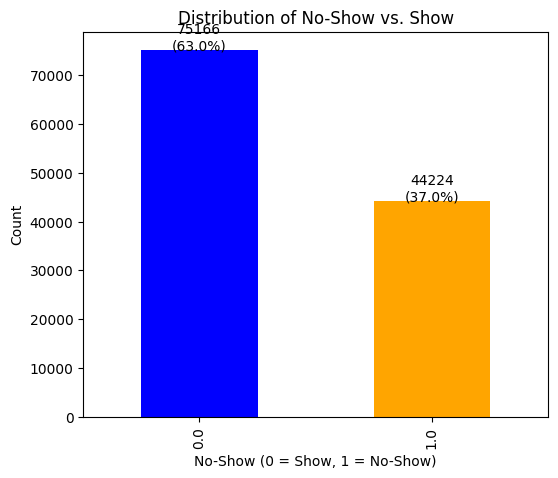


Number of Customers Who Showed Up vs. No-Show:
 no_show
0.0    75166
1.0    44224
Name: count, dtype: int64

Percentage of Customers Who Showed Up vs. No-Show:
 no_show
0.0    62.958372
1.0    37.041628
Name: proportion, dtype: float64


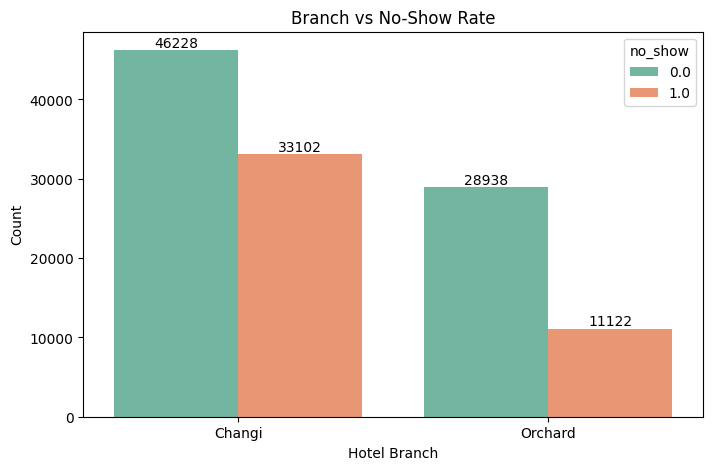


Branch No-Show Counts:
 no_show    0.0    1.0
branch               
Changi   46228  33102
Orchard  28938  11122


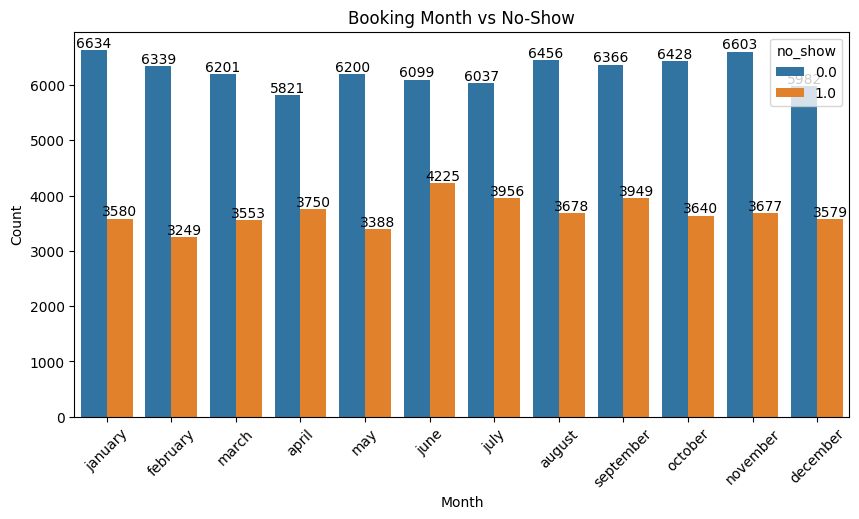


Booking Month vs No-Show:
 no_show         0.0   1.0
booking_month            
april          5821  3750
august         6456  3678
december       5982  3579
february       6339  3249
january        6634  3580
july           6037  3956
june           6099  4225
march          6201  3553
may            6200  3388
november       6603  3677
october        6428  3640
september      6366  3949


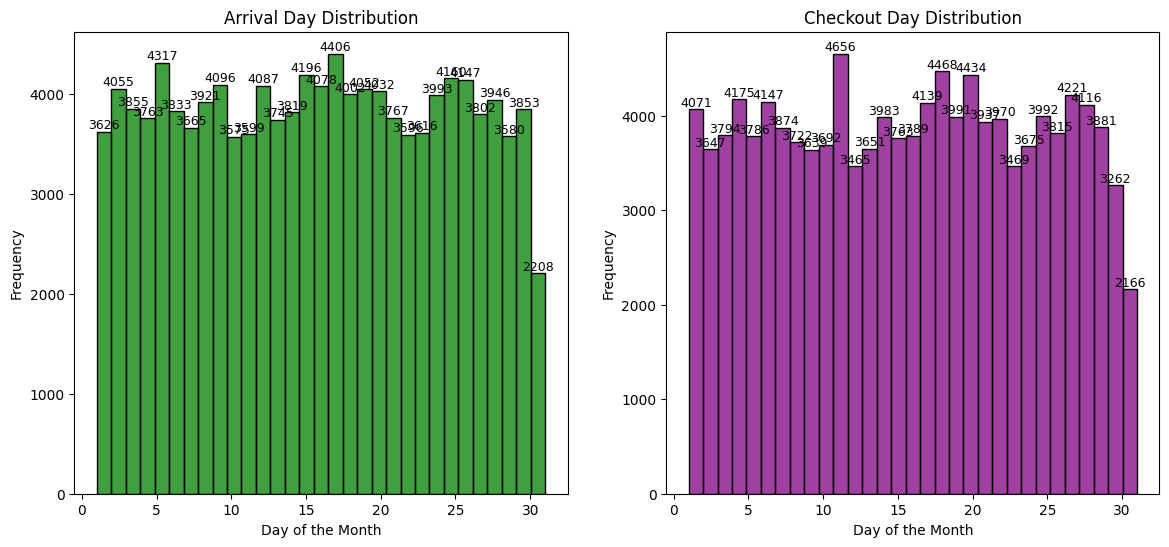

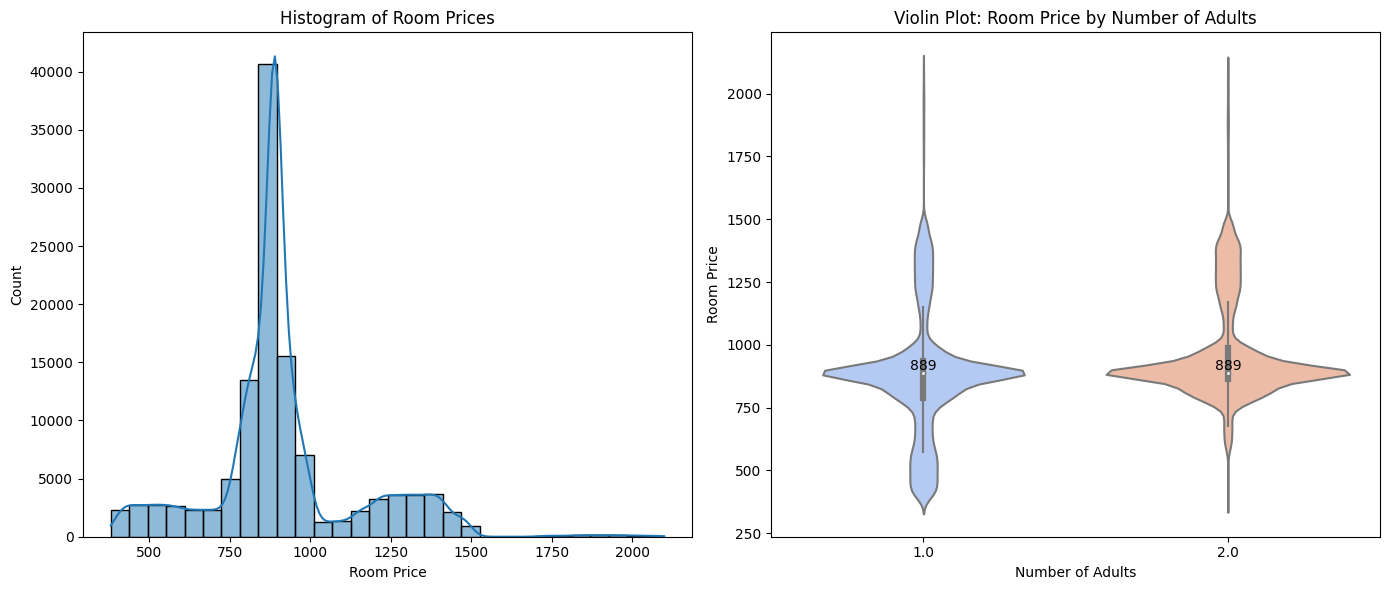


Interquartile Ranges (IQR) for Room Price by No-Show:
             Q1     Q3    IQR
no_show                     
0.0      825.0  974.0  149.0
1.0      826.0  936.0  110.0


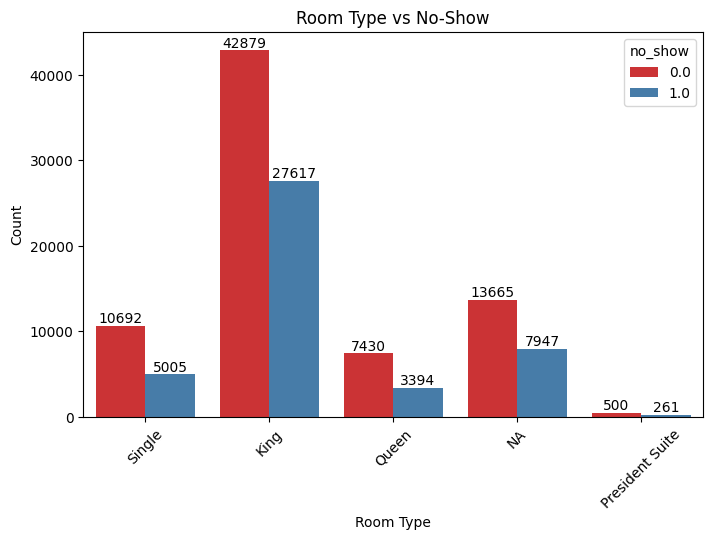


Room Type vs No-Show Counts:
 no_show            0.0    1.0
room                         
King             42879  27617
NA               13665   7947
President Suite    500    261
Queen             7430   3394
Single           10692   5005


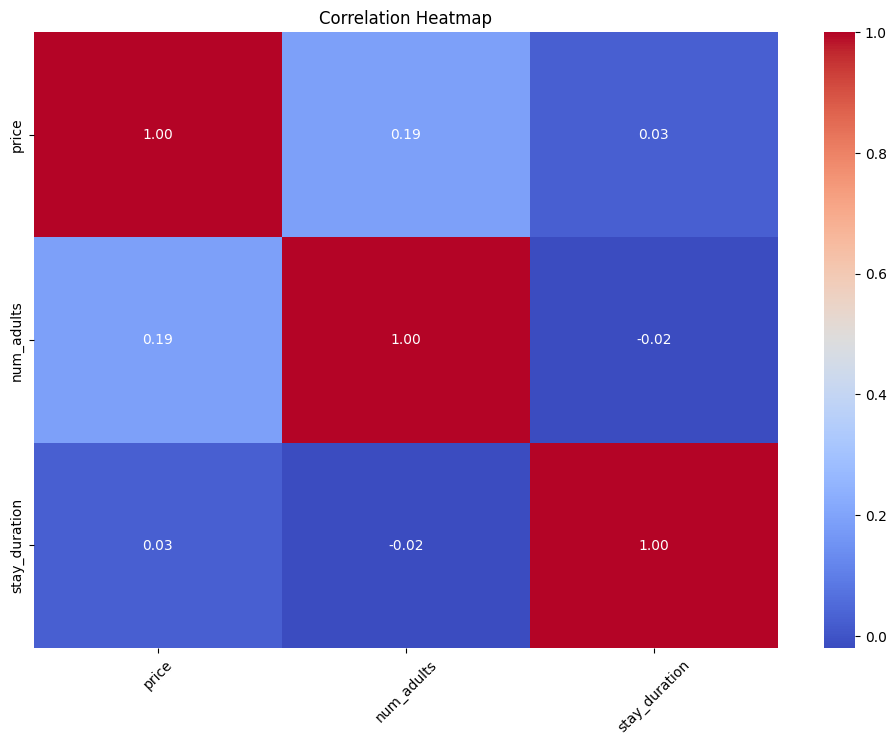


Correlation Matrix:
                   price  num_adults  stay_duration
price          1.000000    0.190304       0.026701
num_adults     0.190304    1.000000      -0.019803
stay_duration  0.026701   -0.019803       1.000000


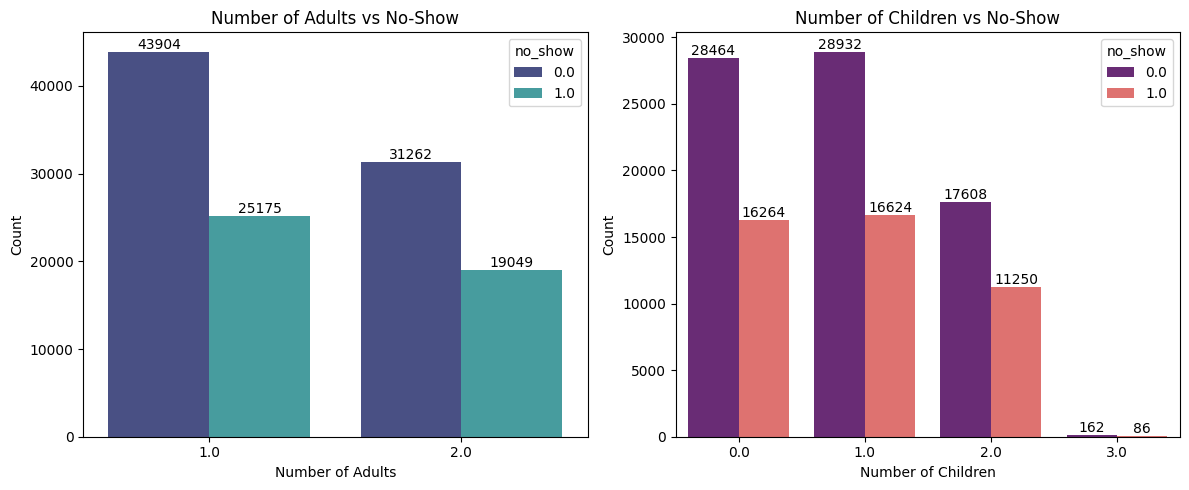

In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Visualization Improvements

# # Target Variable: no_show
# # Objective: Understand the distribution of customers who show up vs. those who don’t.
# no_show_counts = data['no_show'].value_counts()
# no_show_percentages = data['no_show'].value_counts(normalize=True) * 100
# ax = no_show_counts.plot(kind='bar', color=['blue', 'orange'])
# plt.title('Distribution of No-Show vs. Show')
# plt.xlabel('No-Show (0 = Show, 1 = No-Show)')
# plt.ylabel('Count')
# for i, count in enumerate(no_show_counts):
#     ax.text(i, count + 100, f'{count}\n({no_show_percentages[i]:.1f}%)', ha='center')
# plt.show()
# print("\nNumber of Customers Who Showed Up vs. No-Show:\n", no_show_counts)
# print("\nPercentage of Customers Who Showed Up vs. No-Show:\n", no_show_percentages)

# # Hotel Branch Analysis
# # Objective: Analyze how bookings are distributed across branches and their relation to no-shows.
# ax = sns.countplot(data=data, x='branch', hue='no_show', palette='Set2')
# plt.title('Branch vs No-Show Rate')
# plt.xlabel('Hotel Branch')
# plt.ylabel('Count')
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()
# branch_stats = data.groupby(['branch', 'no_show']).size().unstack()
# print("\nBranch No-Show Counts:\n", branch_stats)

# # Booking Month
# # Objective: Understand if the month of booking affects no-shows.
# ax = sns.countplot(data=data, x='booking_month', hue='no_show', order=[
#     'january', 'february', 'march', 'april', 'may', 'june', 'july',
#     'august', 'september', 'october', 'november', 'december'
# ])
# plt.title('Booking Month vs No-Show')
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()
# booking_month_stats = data.groupby(['booking_month', 'no_show']).size().unstack()
# print("\nBooking Month vs No-Show:\n", booking_month_stats)

# # # Arrival and Checkout Days
# # # Arrival Days Visualization
# # arrival_day = pd.to_numeric(data['arrival_day'], errors='coerce').dropna()
# # sns.histplot(arrival_day, kde=False, bins=31, color='green')
# # plt.title('Arrival Day Distribution')
# # plt.xlabel('Day of the Month')
# # plt.ylabel('Frequency')
# # plt.show()
# # # no real stats for this

# # # Checkout Days Visualization
# # checkout_day = pd.to_numeric(data['checkout_day'], errors='coerce').dropna()
# # sns.histplot(checkout_day, kde=False, bins=31, color='purple')
# # plt.title('Checkout Day Distribution')
# # plt.xlabel('Day of the Month')
# # plt.ylabel('Frequency')
# # plt.show()

# # Ensure 'data' is your DataFrame before running the code
# # Convert 'arrival_day' and 'checkout_day' to numeric, dropping NaN values
# arrival_day = pd.to_numeric(data['arrival_day'], errors='coerce').dropna()
# checkout_day = pd.to_numeric(data['checkout_day'], errors='coerce').dropna()

# # Set up the figure layout for arrival and checkout day histograms
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Arrival Day Histogram with Count Labels
# sns.histplot(arrival_day, bins=31, color='green', ax=axes[0])
# axes[0].set_title('Arrival Day Distribution')
# axes[0].set_xlabel('Day of the Month')
# axes[0].set_ylabel('Frequency')

# # Add labels to each bar in Arrival Day Histogram
# for p in axes[0].containers:
#     axes[0].bar_label(p, fmt='%d', fontsize=9, color='black', label_type='edge')

# # Checkout Day Histogram with Count Labels
# sns.histplot(checkout_day, bins=31, color='purple', ax=axes[1])
# axes[1].set_title('Checkout Day Distribution')
# axes[1].set_xlabel('Day of the Month')
# axes[1].set_ylabel('Frequency')

# # Add labels to each bar in Checkout Day Histogram
# for p in axes[1].containers:
#     axes[1].bar_label(p, fmt='%d', fontsize=9, color='black', label_type='edge')

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()
# # no real stats for this

# # Price Analysis
# #histogram
# # Assuming 'data' is your DataFrame, ensure 'price' column is numeric and drop NaN values
# plot_data = data.dropna(subset=['price']).copy()
# plot_data['price'] = pd.to_numeric(plot_data['price'], errors='coerce')

# # Set up the figure layout for histogram and violin plot
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Histogram: Distribution of Room Prices
# sns.histplot(plot_data['price'], bins=30, kde=True, ax=axes[0])
# axes[0].set_title('Histogram of Room Prices')
# axes[0].set_xlabel('Room Price')
# axes[0].set_ylabel('Count')

# # Violin Plot: Room Price Distribution by No-Show Status
# fig, ax = plt.subplots(figsize=(7, 6))

# # Violin Plot: Room Price Distribution by No-Show Status
# sns.violinplot(x='no_show', y='price', data=plot_data, palette='coolwarm', ax=ax)

# # Overlay Median Values
# medians = plot_data.groupby('no_show')['price'].median()
# for i, median in enumerate(medians):
#     ax.text(i, median, f'{median:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# # Set titles and labels
# ax.set_title('Violin Plot: Room Price vs No-Show')
# ax.set_xlabel('No-Show (0 = Show, 1 = No-Show)')
# ax.set_ylabel('Room Price')

# # Adjust layout and display
# plt.tight_layout()
# plt.show()


# # Group by `no_show` and compute IQR for each group
# def calculate_iqr(group):
#     q1 = group.quantile(0.25)  # 25th percentile (Q1)
#     q3 = group.quantile(0.75)  # 75th percentile (Q3)
#     iqr = q3 - q1  # Interquartile Range
#     return q1, q3, iqr

# # Apply the IQR calculation for each no_show group
# iqr_stats = plot_data.groupby('no_show')['price'].apply(calculate_iqr)
# # Convert results into a more readable DataFrame
# iqr_df = pd.DataFrame(iqr_stats.tolist(), columns=['Q1', 'Q3', 'IQR'], index=iqr_stats.index)
# # Print the IQR DataFrame
# print("\nInterquartile Ranges (IQR) for Room Price by No-Show:")
# print(iqr_df)



# # Room Type Analysis
# ax = sns.countplot(data=data, x='room', hue='no_show', palette='Set1')
# plt.title('Room Type vs No-Show')
# plt.xlabel('Room Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()
# room_type_stats = data.groupby(['room', 'no_show']).size().unstack()
# print("\nRoom Type vs No-Show Counts:\n", room_type_stats)

# # Platform Analysis
# ax = sns.countplot(data=data, x='platform', hue='no_show', palette='coolwarm')
# plt.title('Platform vs No-Show')
# plt.xlabel('Platform')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()
# platform_stats = data.groupby(['platform', 'no_show']).size().unstack()
# print("\nPlatform vs No-Show Counts:\n", platform_stats)

# # Correlation Heatmap
# numeric_data = data.select_dtypes(include=['float64', 'int64'])
# corr = numeric_data.corr()
# plt.figure(figsize=(12, 8))  # Adjust figure size
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()
# print("\nCorrelation Matrix:\n", corr)

# # Group Size (Adults and Children)
# ax = sns.countplot(data=data, x='num_adults', hue='no_show', palette='mako')
# plt.title('Number of Adults vs No-Show')
# plt.xlabel('Number of Adults')
# plt.ylabel('Count')
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()

# ax = sns.countplot(data=data, x='num_children', hue='no_show', palette='magma')
# plt.title('Number of Children vs No-Show')
# plt.xlabel('Number of Children')
# plt.ylabel('Count')
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d', label_type='edge')
# plt.show()

# adults_stats = data.groupby(['num_adults', 'no_show']).size().unstack()
# children_stats = data.groupby(['num_children', 'no_show']).size().unstack()
# print("\nAdults Stats:\n", adults_stats)
# print("\nChildren Stats:\n", children_stats)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'data' is properly loaded and defined before running
# Convert columns to numeric where applicable
plot_data = data.dropna(subset=['price']).copy()
plot_data['price'] = pd.to_numeric(plot_data['price'], errors='coerce')

### 📌 **1. No-Show Distribution**
no_show_counts = data['no_show'].value_counts()
no_show_percentages = data['no_show'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6, 5))
no_show_counts.plot(kind='bar', color=['blue', 'orange'], ax=ax)
plt.title('Distribution of No-Show vs. Show')
plt.xlabel('No-Show (0 = Show, 1 = No-Show)')
plt.ylabel('Count')

for i, count in enumerate(no_show_counts):
    ax.text(i, count + 100, f'{count}\n({no_show_percentages[i]:.1f}%)', ha='center')

plt.show()
print("\nNumber of Customers Who Showed Up vs. No-Show:\n", no_show_counts)
print("\nPercentage of Customers Who Showed Up vs. No-Show:\n", no_show_percentages)


### 📌 **2. Hotel Branch Analysis**
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=data, x='branch', hue='no_show', palette='Set2', ax=ax)
plt.title('Branch vs No-Show Rate')
plt.xlabel('Hotel Branch')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

branch_stats = data.groupby(['branch', 'no_show']).size().unstack()
print("\nBranch No-Show Counts:\n", branch_stats)


### 📌 **3. Booking Month vs No-Show**
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='booking_month', hue='no_show', order=[
    'january', 'february', 'march', 'april', 'may', 'june', 'july',
    'august', 'september', 'october', 'november', 'december'
], ax=ax)
plt.title('Booking Month vs No-Show')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

booking_month_stats = data.groupby(['booking_month', 'no_show']).size().unstack()
print("\nBooking Month vs No-Show:\n", booking_month_stats)


### 📌 **4. Arrival & Checkout Day Distribution**
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Convert to numeric
arrival_day = pd.to_numeric(data['arrival_day'], errors='coerce').dropna()
checkout_day = pd.to_numeric(data['checkout_day'], errors='coerce').dropna()

# Arrival Day Histogram
sns.histplot(arrival_day, bins=31, color='green', ax=axes[0])
axes[0].set_title('Arrival Day Distribution')
axes[0].set_xlabel('Day of the Month')
axes[0].set_ylabel('Frequency')

for p in axes[0].containers:
    axes[0].bar_label(p, fmt='%d', fontsize=9, color='black', label_type='edge')

# Checkout Day Histogram
sns.histplot(checkout_day, bins=31, color='purple', ax=axes[1])
axes[1].set_title('Checkout Day Distribution')
axes[1].set_xlabel('Day of the Month')
axes[1].set_ylabel('Frequency')

for p in axes[1].containers:
    axes[1].bar_label(p, fmt='%d', fontsize=9, color='black', label_type='edge')

plt.show()

# 🔹 Ensure 'price' and 'num_adults' are numeric
plot_data = data.dropna(subset=['price', 'num_adults']).copy()
plot_data['price'] = pd.to_numeric(plot_data['price'], errors='coerce')
plot_data['num_adults'] = pd.to_numeric(plot_data['num_adults'], errors='coerce')


### 📌 **5. Price Analysis: Histogram & Violin Plot**
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# 🔹 Histogram of Room Prices
sns.histplot(plot_data['price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Room Prices')
axes[0].set_xlabel('Room Price')
axes[0].set_ylabel('Count')

# 🔹 Violin Plot: Room Price Distribution by Number of Adults
sns.violinplot(data=plot_data, x='num_adults', y='price', palette='coolwarm', ax=axes[1])

# Add Median Values to the Violin Plot
medians = plot_data.groupby('num_adults')['price'].median()
for i, median in enumerate(medians):
    axes[1].text(i, median, f'{median:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Labels and Titles for Violin Plot
axes[1].set_title('Violin Plot: Room Price by Number of Adults')
axes[1].set_xlabel('Number of Adults')
axes[1].set_ylabel('Room Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 📌 **6. Interquartile Range (IQR) Analysis**
def calculate_iqr(group):
    q1 = group.quantile(0.25)  
    q3 = group.quantile(0.75)  
    return q1, q3, q3 - q1  

iqr_stats = plot_data.groupby('no_show')['price'].apply(calculate_iqr)
iqr_df = pd.DataFrame(iqr_stats.tolist(), columns=['Q1', 'Q3', 'IQR'], index=iqr_stats.index)

print("\nInterquartile Ranges (IQR) for Room Price by No-Show:\n", iqr_df)


### 📌 **7. Room Type Analysis**
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=data, x='room', hue='no_show', palette='Set1', ax=ax)
plt.title('Room Type vs No-Show')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()
room_type_stats = data.groupby(['room', 'no_show']).size().unstack()
print("\nRoom Type vs No-Show Counts:\n", room_type_stats)


### 📌 **8. Correlation Heatmap**
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()
print("\nCorrelation Matrix:\n", corr)


### 📌 **9. Group Size Analysis (Adults & Children)**
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Adults vs No-Show
sns.countplot(data=data, x='num_adults', hue='no_show', palette='mako', ax=axes[0])
axes[0].set_title('Number of Adults vs No-Show')
axes[0].set_xlabel('Number of Adults')
axes[0].set_ylabel('Count')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='edge')

# Children vs No-Show
sns.countplot(data=data, x='num_children', hue='no_show', palette='magma', ax=axes[1])
axes[1].set_title('Number of Children vs No-Show')
axes[1].set_xlabel('Number of Children')
axes[1].set_ylabel('Count')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

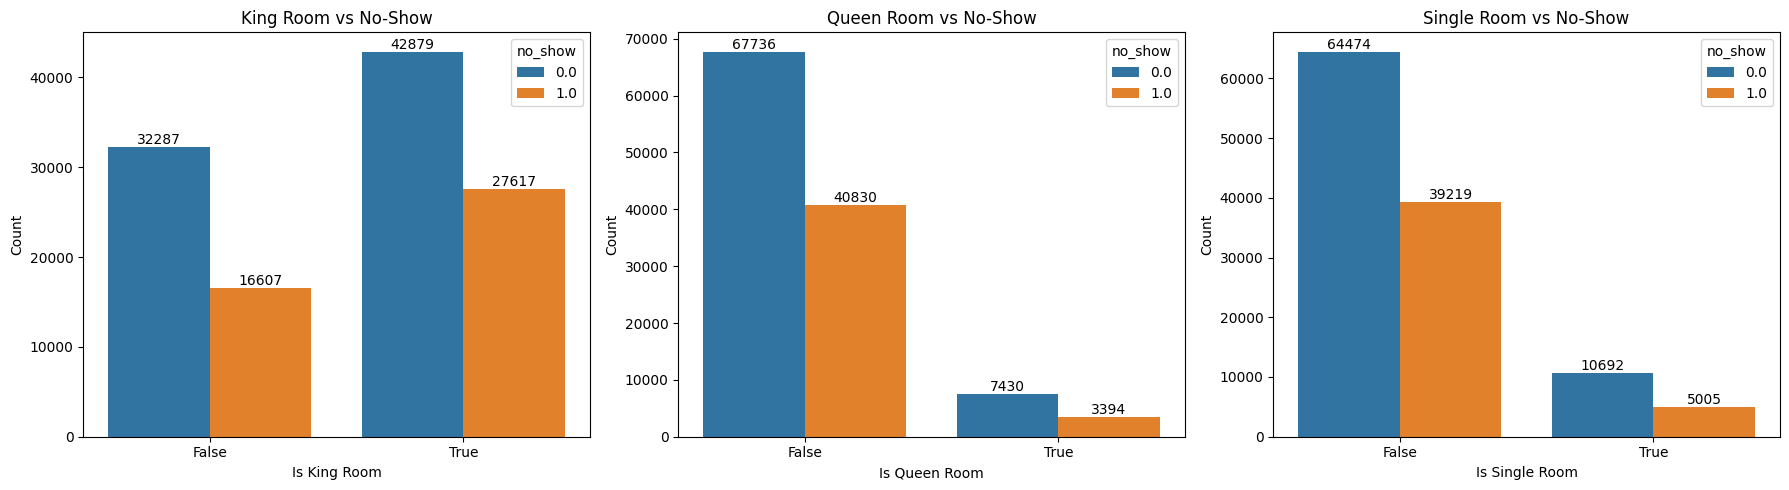

In [38]:
# # To do Change for this
# # Example: Analyze room type and no-show rate
# # sns.countplot(data=data, x='Single', hue='no_show')
# # plt.title('King Room vs No-Show')
# # plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a new column for King room identification
# data['is_king_room'] = data['room'] == "King"

# # Plot using the new column
# sns.countplot(data=data, x='is_king_room', hue='no_show')
# plt.title('King Room vs No-Show')
# plt.xlabel('Is King Room')
# plt.ylabel('Count')
# plt.show()

# # Create a new column for King room identification
# data['is_queen_room'] = data['room'] == "Queen"

# # Plot using the new column
# sns.countplot(data=data, x='is_queen_room', hue='no_show')
# plt.title('Queen Room vs No-Show')
# plt.xlabel('Is Queen Room')
# plt.ylabel('Count')
# plt.show()

# # Create a new column for King room identification
# data['is_single_room'] = data['room'] == "Single"

# # Plot using the new column
# sns.countplot(data=data, x='is_single_room', hue='no_show')
# plt.title('Single Room vs No-Show')
# plt.xlabel('Is Single Room')
# plt.ylabel('Count')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'data' is loaded
# Example: data = pd.read_csv("your_dataset.csv")

# Create new boolean columns for each room type
data['is_king_room'] = data['room'] == "King"
data['is_queen_room'] = data['room'] == "Queen"
data['is_single_room'] = data['room'] == "Single"

# Set up figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 📌 **1. King Room vs No-Show**
ax1 = sns.countplot(data=data, x='is_king_room', hue='no_show', ax=axes[0])
axes[0].set_title('King Room vs No-Show')
axes[0].set_xlabel('Is King Room')
axes[0].set_ylabel('Count')

# Add labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge')

# 📌 **2. Queen Room vs No-Show**
ax2 = sns.countplot(data=data, x='is_queen_room', hue='no_show', ax=axes[1])
axes[1].set_title('Queen Room vs No-Show')
axes[1].set_xlabel('Is Queen Room')
axes[1].set_ylabel('Count')

# Add labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge')

# 📌 **3. Single Room vs No-Show**
ax3 = sns.countplot(data=data, x='is_single_room', hue='no_show', ax=axes[2])
axes[2].set_title('Single Room vs No-Show')
axes[2].set_xlabel('Is Single Room')
axes[2].set_ylabel('Count')

# Add labels
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [39]:
# 1. No-Show Distribution
no_show_stats = data['no_show'].value_counts(normalize=True) * 100
print("No-Show Distribution (%):\n", no_show_stats)

No-Show Distribution (%):
 no_show
0.0    62.958372
1.0    37.041628
Name: proportion, dtype: float64


In [40]:
# 2. Branch Analysis
branch_stats = data.groupby(['branch', 'no_show']).size()
print("Branch No-Show Counts:\n", branch_stats)


Branch No-Show Counts:
 branch   no_show
Changi   0.0        46228
         1.0        33102
Orchard  0.0        28938
         1.0        11122
dtype: int64


In [41]:
# 3. Booking Month Analysis
booking_month_stats = data.groupby(['booking_month', 'no_show']).size().unstack()
print("Booking Month vs No-Show:\n", booking_month_stats)


Booking Month vs No-Show:
 no_show         0.0   1.0
booking_month            
april          5821  3750
august         6456  3678
december       5982  3579
february       6339  3249
january        6634  3580
july           6037  3956
june           6099  4225
march          6201  3553
may            6200  3388
november       6603  3677
october        6428  3640
september      6366  3949


In [42]:

# 4. Arrival Day Analysis
arrival_mean = pd.to_numeric(data['arrival_day'], errors='coerce').mean()
arrival_median = pd.to_numeric(data['arrival_day'], errors='coerce').median()
print(f"Arrival Day - Mean: {arrival_mean}, Median: {arrival_median}")


Arrival Day - Mean: 15.798241058715135, Median: 16.0


In [43]:

# 5. Price Analysis
price_stats = data.groupby('no_show')['price'].describe()
print("Price Analysis:\n", price_stats)

# Calculate the difference between max and min values
price_diff = price_stats['max'] - price_stats['min']

print("\nDifference (Max - Min):")
print(price_diff)



Price Analysis:
            count        mean         std    min    25%    50%    75%     max
no_show                                                                     
0.0      75166.0  926.828393  243.558425  380.0  825.0  889.0  974.0  2100.0
1.0      44224.0  901.524353  210.343160  380.0  826.0  889.0  936.0  2098.0

Difference (Max - Min):
no_show
0.0    1720.0
1.0    1718.0
dtype: float64


In [44]:

# 6. Room Type Analysis
room_type_stats = data.groupby(['room', 'no_show']).size()
print("Room Type vs No-Show Counts:\n", room_type_stats)


Room Type vs No-Show Counts:
 room             no_show
King             0.0        42879
                 1.0        27617
NA               0.0        13665
                 1.0         7947
President Suite  0.0          500
                 1.0          261
Queen            0.0         7430
                 1.0         3394
Single           0.0        10692
                 1.0         5005
dtype: int64


In [45]:

# 7. Platform Analysis
platform_stats = data.groupby(['platform', 'no_show']).size()
print("Platform vs No-Show Counts:\n", platform_stats)


Platform vs No-Show Counts:
 platform  no_show
Agent     0.0        13696
          1.0         8039
Email     0.0        20394
          1.0        12214
Phone     0.0         6892
          1.0         3921
Website   0.0        34184
          1.0        20050
dtype: int64


In [46]:

# 8. Correlation Matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
print("Correlation Matrix:\n", corr)


Correlation Matrix:
                   price  num_adults  stay_duration
price          1.000000    0.190304       0.026701
num_adults     0.190304    1.000000      -0.019803
stay_duration  0.026701   -0.019803       1.000000


In [47]:
# 9. Group Size
adults_stats = data.groupby(['num_adults', 'no_show']).size()
children_stats = data.groupby(['num_children', 'no_show']).size()
print("Adults Stats:\n", adults_stats)
print("Children Stats:\n", children_stats)

Adults Stats:
 num_adults  no_show
1.0         0.0        43904
            1.0        25175
2.0         0.0        31262
            1.0        19049
dtype: int64
Children Stats:
 num_children  no_show
0.0           0.0        28464
              1.0        16264
1.0           0.0        28932
              1.0        16624
2.0           0.0        17608
              1.0        11250
3.0           0.0          162
              1.0           86
dtype: int64


In [48]:
print(data.head())

  no_show   branch booking_month arrival_month arrival_day checkout_month  \
0     0.0   Changi      november          June        25.0           June   
1     0.0  Orchard        august      November        28.0       November   
2     0.0   Changi         march      February         7.0       February   
3     1.0  Orchard     september       October         1.0        October   
4     0.0  Orchard         march          June        20.0           June   

  checkout_day    country first_time    room  ...  arrival_month_November  \
0         27.0  Singapore        Yes  Single  ...                      NO   
1         29.0  Indonesia        Yes    King  ...                     YES   
2         11.0      India        Yes  Single  ...                      NO   
3          3.0      China        Yes  Single  ...                      NO   
4         24.0  Australia        Yes   Queen  ...                      NO   

  arrival_month_December  arrival_date checkout_date arrival_day_type  \
0

no_show                         0.0    1.0
is_holiday_season_in_country              
NO                            49931  30460
YES                           25235  13764


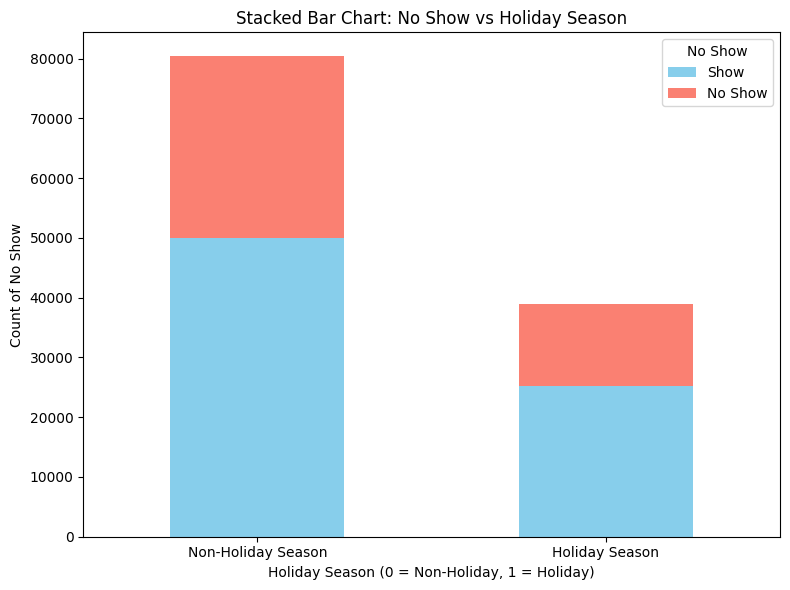

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# Count occurrences of combinations of no_show and is_holiday_season_in_country
counts = pd.crosstab(df['is_holiday_season_in_country'], df['no_show'], margins=False)
print(counts)
# Plot stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Stacked Bar Chart: No Show vs Holiday Season')
plt.xlabel('Holiday Season (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Count of No Show')
plt.xticks([0, 1], ['Non-Holiday Season', 'Holiday Season'], rotation=0)
plt.legend(title='No Show', labels=['Show', 'No Show'])
plt.tight_layout()

# Show plot
plt.show()

no_show             0.0    1.0
arrival_day_type              
WEEKDAY           53574  30393
WEEKEND           21592  13831


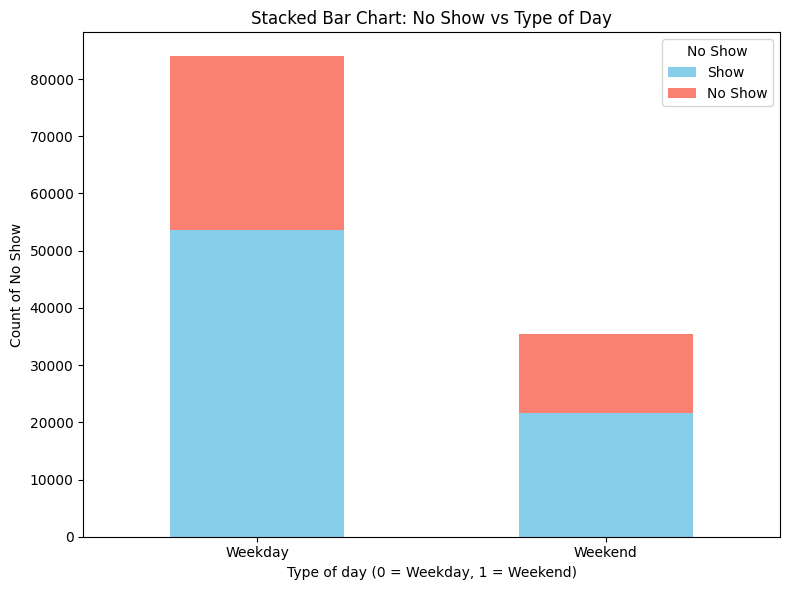

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# Count occurrences of combinations of no_show and is_holiday_season_in_country
counts = pd.crosstab(df['arrival_day_type'], df['no_show'], margins=False)
print(counts)
# Plot stacked bar chart
counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Stacked Bar Chart: No Show vs Type of Day')
plt.xlabel('Type of day (0 = Weekday, 1 = Weekend)')
plt.ylabel('Count of No Show')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.legend(title='No Show', labels=['Show', 'No Show'])
plt.tight_layout()

# Show plot
plt.show()

In [51]:
# Count occurrences of each unique value in the 'is_holiday_season_in_country' column
holiday_counts = df['is_holiday_season_in_country'].value_counts()

print(holiday_counts)

is_holiday_season_in_country
NO     80391
YES    38999
Name: count, dtype: int64


### GRAPHS FROM YOLANDA BRANCH

In [52]:
# # Categorical Feature Exploration - Booking Trends
# # Define the correct month order
# month_order = ["january", "february", "march", "april", "may", "june", 
#                 "july", "august", "september", "october", "november", "december"]

# plt.figure(figsize=(12, 6))
# sns.countplot(x='booking_month', hue='no_show', data=data, palette='coolwarm', 
#                 order=month_order)  # Set the correct order
# plt.title("No-Show Rate by Booking Month")
# plt.xticks(rotation=45)  # Rotate labels for better visibility
# plt.show()

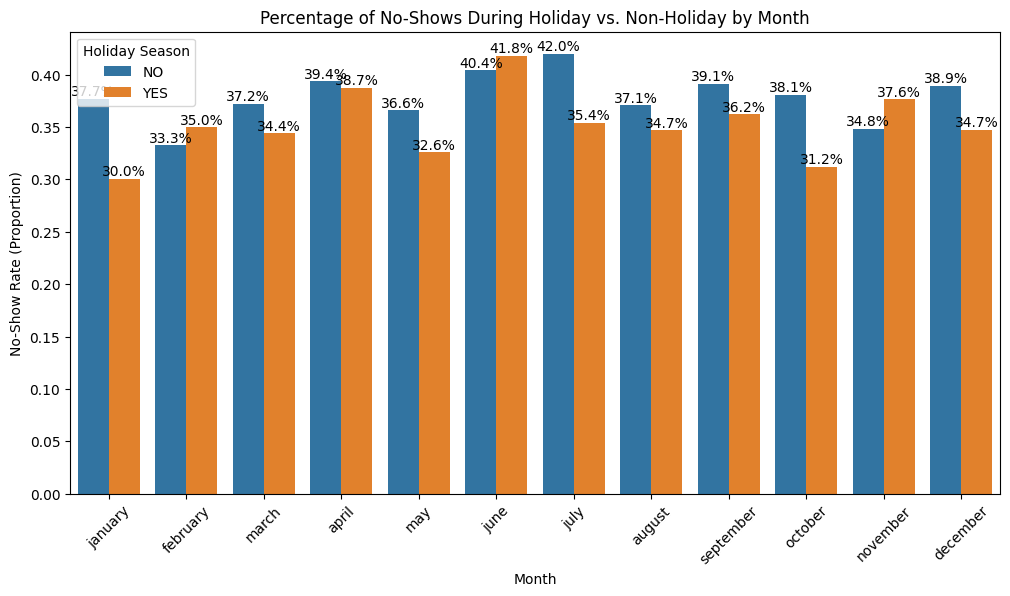

In [53]:
# Holiday Season Impact
data_grouped = data.groupby(['booking_month', 'is_holiday_season_in_country'])['no_show'].mean().reset_index()

# Define the correct month order
month_order = ["january", "february", "march", "april", "may", "june", 
                "july", "august", "september", "october", "november", "december"]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='booking_month', y='no_show', hue='is_holiday_season_in_country', 
                data=data_grouped, palette=["#1f77b4", "#ff7f0e"], order=month_order)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}",  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10)

# Improve legend
plt.legend(title="Holiday Season")

# Titles and labels
plt.title("Percentage of No-Shows During Holiday vs. Non-Holiday by Month")
plt.xlabel("Month")
plt.ylabel("No-Show Rate (Proportion)")
plt.xticks(rotation=45)

plt.show()

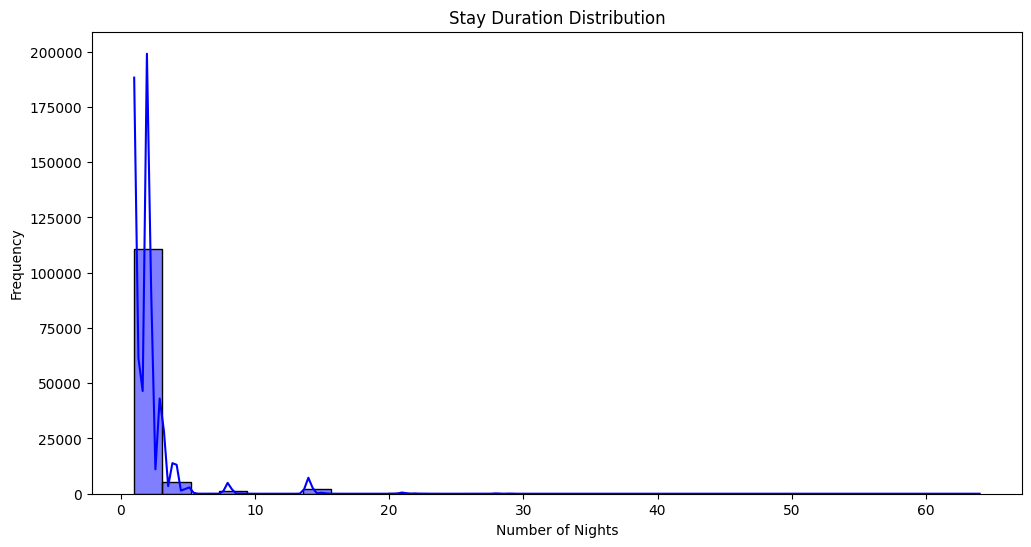

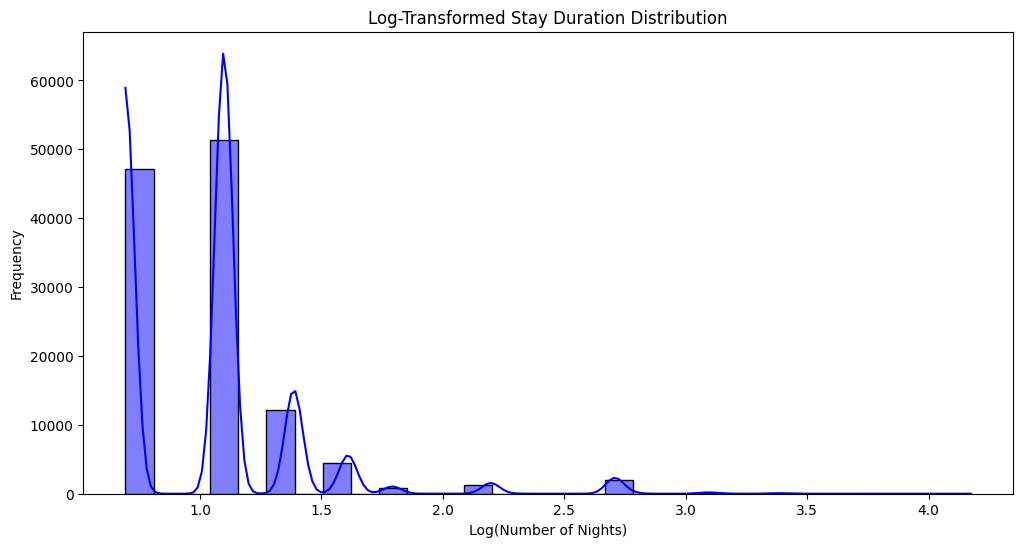

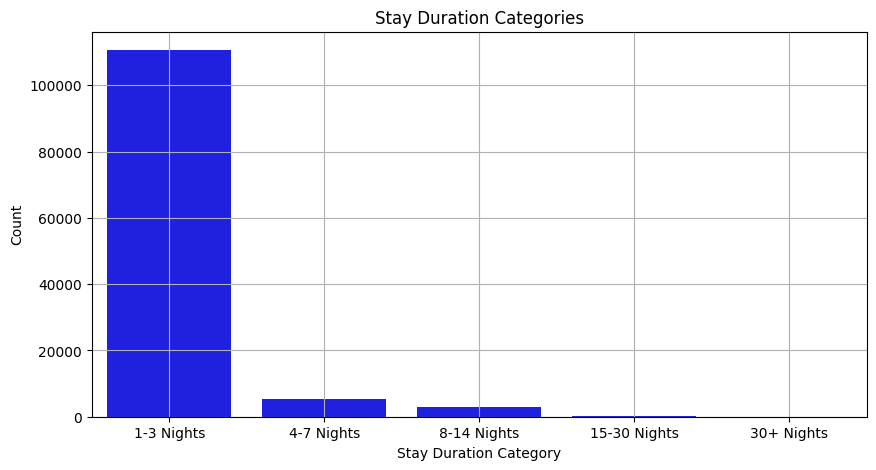

In [54]:
# Stay Duration
plt.figure(figsize=(12, 6))
sns.histplot(data['stay_duration'], kde=True, bins=30, color='blue')
plt.title("Stay Duration Distribution")
plt.xlabel("Number of Nights")
plt.ylabel("Frequency")
plt.show()

# Avoid log(0) error by adding +1 to stay_duration
log_stay_duration = np.log1p(data['stay_duration'])

plt.figure(figsize=(12, 6))
sns.histplot(log_stay_duration, kde=True, bins=30, color='blue')
plt.title("Log-Transformed Stay Duration Distribution")
plt.xlabel("Log(Number of Nights)")
plt.ylabel("Frequency")
plt.show()


# Categorize stay durations
data['stay_category'] = pd.cut(data['stay_duration'], 
                               bins=[0, 3, 7, 14, 30, 100], 
                               labels=["1-3 Nights", "4-7 Nights", "8-14 Nights", "15-30 Nights", "30+ Nights"])

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='stay_category', color='blue')
plt.title("Stay Duration Categories")
plt.xlabel("Stay Duration Category")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### GRAPHS FROM DAIXUAN BRANCH

In [55]:
holiday_season_map = {'NO': 0, 'YES': 1}
data['is_holiday_season_in_country'] = data['is_holiday_season_in_country'].map(holiday_season_map)

type_of_day_map = {'WEEKDAY': 0, 'WEEKEND': 1}
data['arrival_day_type'] = data['arrival_day_type'].map(type_of_day_map)

first_time_map = {'No': 0, 'Yes': 1}
data['first_time'] = data['first_time'].map(first_time_map)

month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
            'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['arrival_month'] = data['arrival_month'].astype(str).str.capitalize().map(month_map)
data['booking_month'] = data['booking_month'].astype(str).str.capitalize().map(month_map)
data['checkout_month'] = data['checkout_month'].astype(str).str.capitalize().map(month_map)

corr_matrix = data[['no_show', 'booking_month', 'arrival_month', 'arrival_day', 'arrival_day_type', 'is_holiday_season_in_country', 'checkout_month', 'checkout_day', 'stay_duration',
                    'first_time', 'price', 'num_adults']].corr()
print(corr_matrix)
cov_matrix = data[['no_show', 'booking_month', 'arrival_month', 'arrival_day', 'arrival_day_type', 'is_holiday_season_in_country', 'checkout_month', 'checkout_day', 'stay_duration',
                    'first_time', 'price', 'num_adults']].cov()
print(cov_matrix)
corr_matrix = data[['arrival_month', 'no_show']].corr()

                               no_show  booking_month  arrival_month  \
no_show                       1.000000       0.009373       0.011022   
booking_month                 0.009373       1.000000       0.046552   
arrival_month                 0.011022       0.046552       1.000000   
arrival_day                  -0.006130      -0.001336      -0.026063   
arrival_day_type              0.026948       0.011908      -0.025817   
is_holiday_season_in_country -0.025217      -0.004632      -0.064844   
checkout_month                0.013941       0.045737       0.954684   
checkout_day                 -0.015549       0.001230      -0.038482   
stay_duration                 0.019748      -0.011677      -0.002287   
first_time                    0.084793       0.019656       0.030729   
price                        -0.052642       0.004346       0.003196   
num_adults                    0.014506      -0.001731       0.006147   

                              arrival_day  arrival_day_type  \


#### Group by arrival month and count no-shows

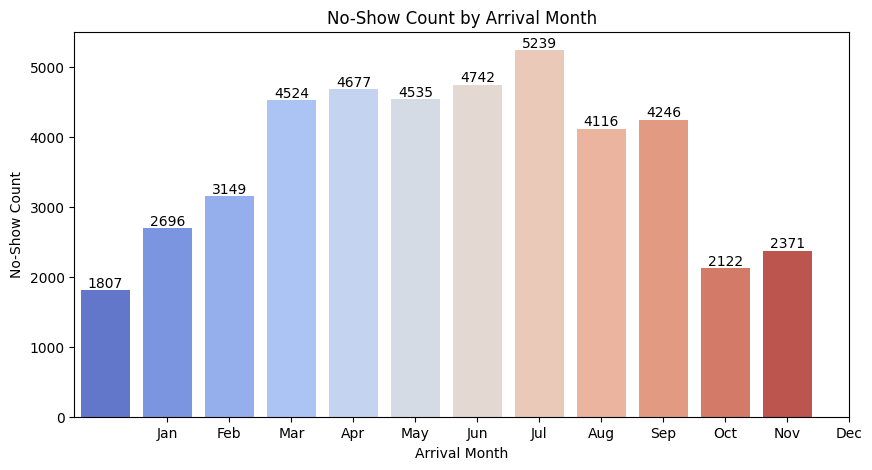

In [56]:
# # month_no_show = data.groupby('arrival_month')['no_show'].sum()

# # plt.figure(figsize=(10, 5))
# # sns.barplot(x=month_no_show.index, y=month_no_show.values, hue=month_no_show.index, palette='coolwarm', legend=False)

# # plt.xlabel("Arrival Month")
# # plt.ylabel("No-Show Count")
# # plt.title("No-Show Count by Arrival Month")
# # plt.xticks(ticks=range(12), labels=[
# #     'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
# #     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Grouping data to get the total number of no-shows per arrival month
# month_no_show = data.groupby('arrival_month')['no_show'].sum()

# # Create the plot
# plt.figure(figsize=(10, 5))
# sns.barplot(x=month_no_show.index, y=month_no_show.values, palette='coolwarm')

# # Formatting the plot
# plt.xlabel("Arrival Month")
# plt.ylabel("No-Show Count")
# plt.title("No-Show Count by Arrival Month")
# plt.xticks(ticks=range(1, 13), labels=[
#     'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Show the plot
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data to get the total number of no-shows per arrival month
month_no_show = data.groupby('arrival_month')['no_show'].sum()

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=month_no_show.index, y=month_no_show.values, palette='coolwarm')

# Formatting the plot
plt.xlabel("Arrival Month")
plt.ylabel("No-Show Count")
plt.title("No-Show Count by Arrival Month")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add labels to the bars
for p in ax.containers:
    ax.bar_label(p, fmt='%d', label_type='edge', fontsize=10, color='black')

# Show the plot
plt.show()

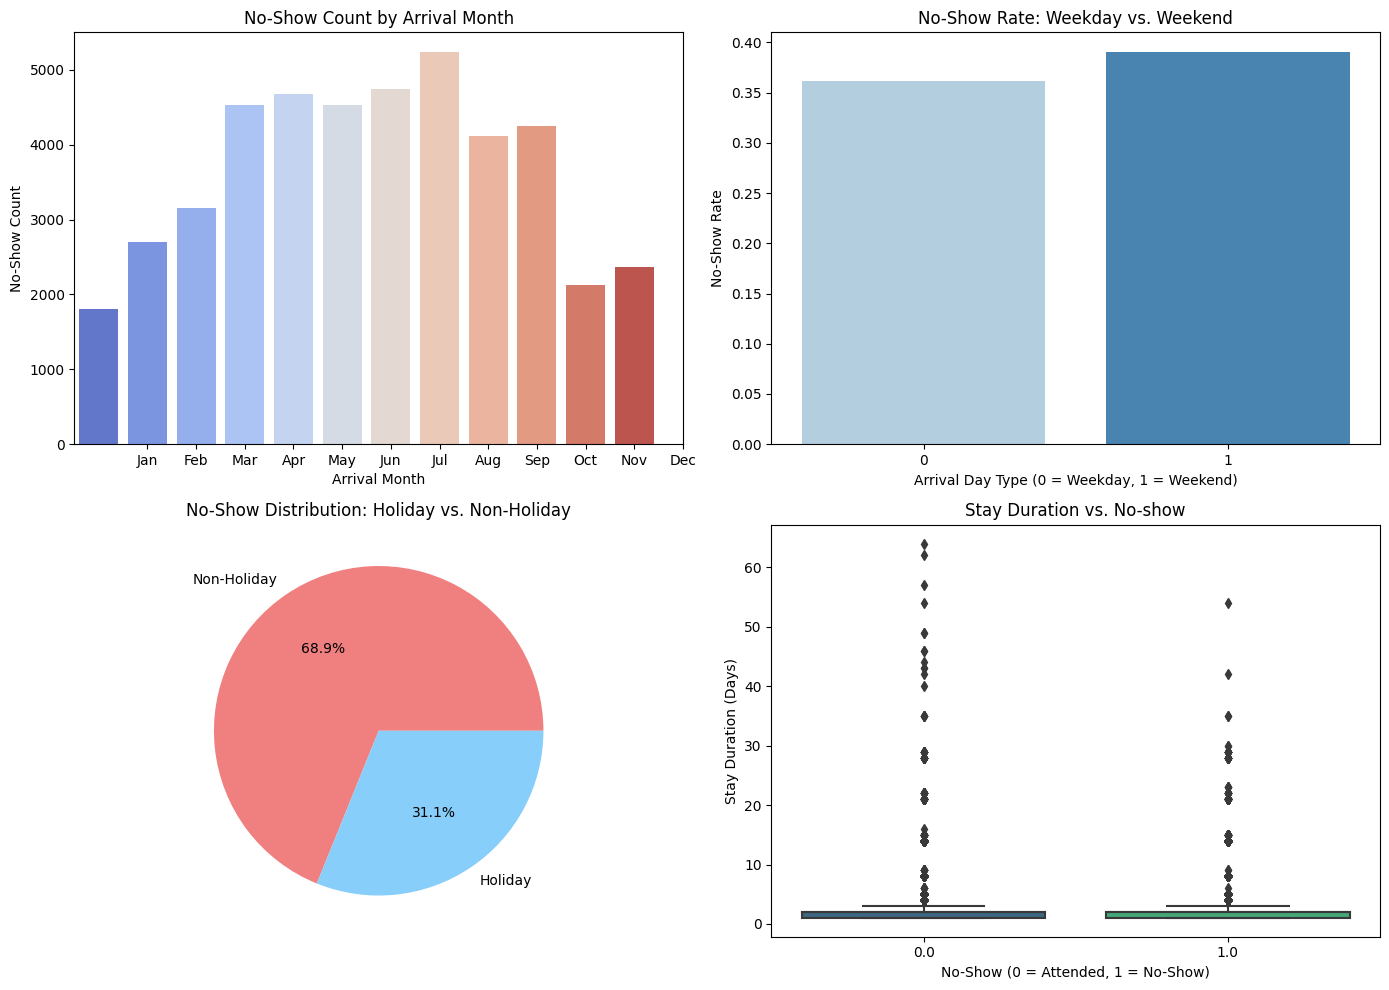

In [57]:
# # Set up the figure layout
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# # 1. Bar Chart: No-show Count by Arrival Month
# sns.barplot(x=data.groupby('arrival_month')['no_show'].sum().index,
#             y=data.groupby('arrival_month')['no_show'].sum().values, 
#             hue=data.groupby('arrival_month')['no_show'].sum().index,  # Fix: Assign hue
#             palette='coolwarm', legend=False, ax=axes[0, 0])
# axes[0, 0].set_title("No-Show Count by Arrival Month")
# axes[0, 0].set_xlabel("Arrival Month")
# axes[0, 0].set_ylabel("No-Show Count")
# axes[0, 0].set_xticks(range(12))  
# axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # 2. Bar Chart: No-show Rate for Arrival Day Type (Weekday vs. Weekend)
# sns.barplot(x=data.groupby('arrival_day_type')['no_show'].mean().index,
#             y=data.groupby('arrival_day_type')['no_show'].mean().values,
#             hue=data.groupby('arrival_day_type')['no_show'].mean().index,  # Fix: Assign hue
#             palette='Blues', legend=False, ax=axes[0, 1])
# axes[0, 1].set_title("No-Show Rate: Weekday vs. Weekend")
# axes[0, 1].set_xlabel("Arrival Day Type (0 = Weekday, 1 = Weekend)")
# axes[0, 1].set_ylabel("No-Show Rate")

# # 3. Pie Chart: No-show Distribution in Holiday vs. Non-Holiday Season
# holiday_counts = data.groupby('is_holiday_season_in_country')['no_show'].sum()
# axes[1, 0].pie(holiday_counts, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
# axes[1, 0].set_title("No-Show Distribution: Holiday vs. Non-Holiday")

# # 4. Box Plot: Stay Duration vs. No-show Rate
# sns.boxplot(x=data['no_show'], y=data['stay_duration'], 
#             hue=data['no_show'],  # Fix: Assign hue
#             palette='viridis', legend=False, ax=axes[1, 1])
# axes[1, 1].set_title("Stay Duration vs. No-show")
# axes[1, 1].set_xlabel("No-Show (0 = Attended, 1 = No-Show)")
# axes[1, 1].set_ylabel("Stay Duration (Days)")

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar Chart: No-show Count by Arrival Month
month_no_show = data.groupby('arrival_month')['no_show'].sum()
sns.barplot(x=month_no_show.index, y=month_no_show.values, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("No-Show Count by Arrival Month")
axes[0, 0].set_xlabel("Arrival Month")
axes[0, 0].set_ylabel("No-Show Count")
axes[0, 0].set_xticks(range(1, 13))  
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2. Bar Chart: No-show Rate for Arrival Day Type (Weekday vs. Weekend)
day_type_no_show = data.groupby('arrival_day_type')['no_show'].mean()
sns.barplot(x=day_type_no_show.index, y=day_type_no_show.values, palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title("No-Show Rate: Weekday vs. Weekend")
axes[0, 1].set_xlabel("Arrival Day Type (0 = Weekday, 1 = Weekend)")
axes[0, 1].set_ylabel("No-Show Rate")

# 3. Pie Chart: No-show Distribution in Holiday vs. Non-Holiday Season
holiday_counts = data.groupby('is_holiday_season_in_country')['no_show'].sum()
axes[1, 0].pie(holiday_counts, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
axes[1, 0].set_title("No-Show Distribution: Holiday vs. Non-Holiday")

# 4. Box Plot: Stay Duration vs. No-show Rate
sns.boxplot(x=data['no_show'], y=data['stay_duration'], palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Stay Duration vs. No-show")
axes[1, 1].set_xlabel("No-Show (0 = Attended, 1 = No-Show)")
axes[1, 1].set_ylabel("Stay Duration (Days)")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

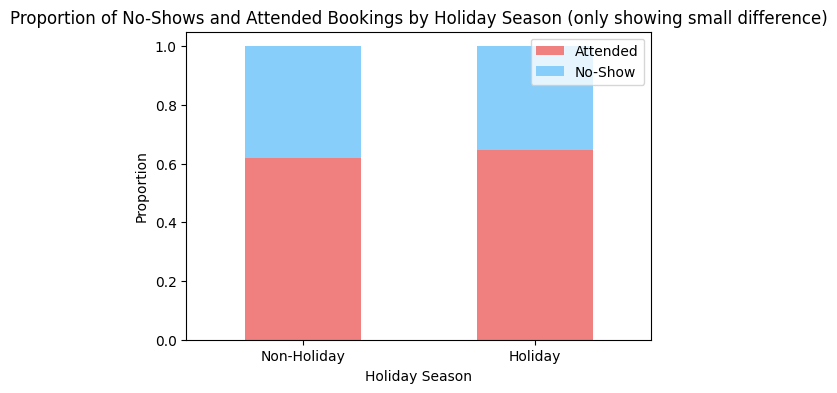

Chi-Square Statistic: 75.8093, p-value: 0.0000
Point-Biserial Correlation: -0.0252, p-value: 0.0000
                               no_show  booking_month  arrival_month  \
no_show                       1.000000       0.009373       0.011022   
booking_month                 0.009373       1.000000       0.046552   
arrival_month                 0.011022       0.046552       1.000000   
arrival_day                  -0.006130      -0.001336      -0.026063   
arrival_day_type              0.026948       0.011908      -0.025817   
is_holiday_season_in_country -0.025217      -0.004632      -0.064844   
checkout_month                0.013941       0.045737       0.954684   
checkout_day                 -0.015549       0.001230      -0.038482   
stay_duration                 0.019748      -0.011677      -0.002287   
first_time                    0.084793       0.019656       0.030729   
price                        -0.052642       0.004346       0.003196   
num_adults                    0.0145

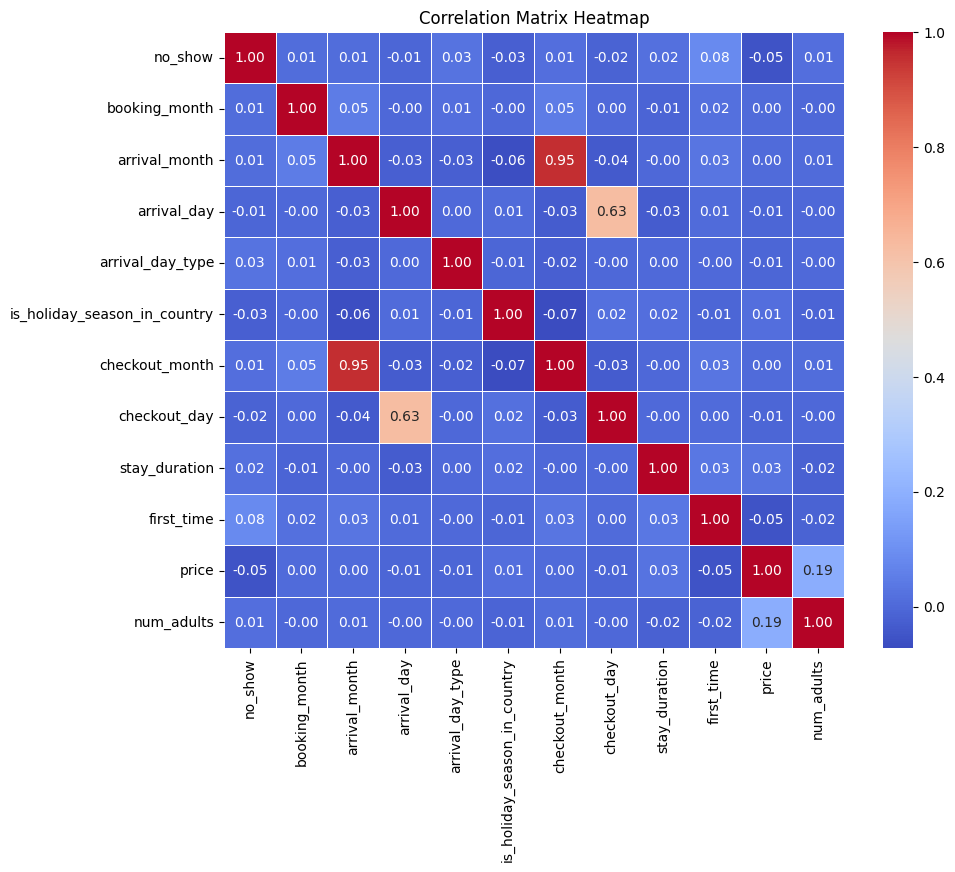

In [58]:
import scipy.stats as stats

# Ensure data columns are numeric
data['is_holiday_season_in_country'] = pd.to_numeric(data['is_holiday_season_in_country'], errors='coerce')
data['no_show'] = pd.to_numeric(data['no_show'], errors='coerce')

# Drop NaN values if conversion failed
data = data.dropna(subset=['is_holiday_season_in_country', 'no_show'])

# Stacked Bar Chart: Proportion of No-Shows and Attended Bookings by Holiday Season
holiday_counts = data.groupby(['is_holiday_season_in_country', 'no_show']).size().unstack()
holiday_counts_norm = holiday_counts.div(holiday_counts.sum(axis=1), axis=0)

holiday_counts_norm.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(6, 4))
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.xlabel("Holiday Season")
plt.ylabel("Proportion")
plt.title("Proportion of No-Shows and Attended Bookings by Holiday Season (only showing small difference)")
plt.legend(["Attended", "No-Show"], loc='upper right')
plt.show()

# Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(holiday_counts)
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

# Point-Biserial Correlation
r_pb, p_pb = stats.pointbiserialr(data['is_holiday_season_in_country'], data['no_show'])
print(f"Point-Biserial Correlation: {r_pb:.4f}, p-value: {p_pb:.4f}")

# Correlation Matrix
corr_matrix = data[['no_show', 'booking_month', 'arrival_month', 'arrival_day', 'arrival_day_type', 'is_holiday_season_in_country', 'checkout_month', 'checkout_day', 'stay_duration',
                    'first_time', 'price', 'num_adults']].corr()
print(corr_matrix)

# Covariance Matrix
cov_matrix = data[['no_show', 'booking_month', 'arrival_month', 'arrival_day', 'arrival_day_type', 'is_holiday_season_in_country', 'checkout_month', 'checkout_day', 'stay_duration',
                    'first_time', 'price', 'num_adults']].cov()
print(cov_matrix)

# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Above heatmap tell us that:
### No-Show Correlations:
<ul>
    <li>first_time (0.08) has the highest correlation with no_show, indicating that first-time visitors might have a slightly higher tendency to not show up.</li>
    <li>stay_duration (0.02) and arrival_month (0.01) show very weak correlations.</li>
    <li>price (-0.06) suggests a slight negative correlation, meaning higher prices might be linked to fewer no-shows, but it's weak.</li>
</ul>

### Holiday Season (is_holiday_season_in_country) and No-Show:
<ul>
    <li>The correlation with no_show is -0.03, which is very weak, supporting the covariance result that the relationship is not strong.</li>
    <li>This aligns with the idea that the holiday season might have an effect, but it’s not a major determinant of no-shows.</li>
</ul>


### Strong Correlations Between Other Variables:
<ul>
    <li>arrival_month and checkout_month (0.95) are highly correlated, which makes sense since most people check out in the same month they arrive.</li>
    <li>checkout_day and stay_duration (-0.38) show a moderate negative correlation, suggesting that longer stays tend to have earlier checkout days.</li>
</ul>

### What This Means for No-Show Analysis:
<ul>
    <li>No single variable has a strong impact on no_show.</li>
    <li>first_time, price, and is_holiday_season_in_country are slightly related, but their weak correlations suggest that other factors (perhaps personal behavior, scheduling conflicts, or external influences) might play a bigger role in determining no-shows.</li>
    <li>The covariance result (0.0057 for holidays vs. no-show) aligns with this, showing that while there is a relationship, it's not a strong predictor.</li>
</ul>




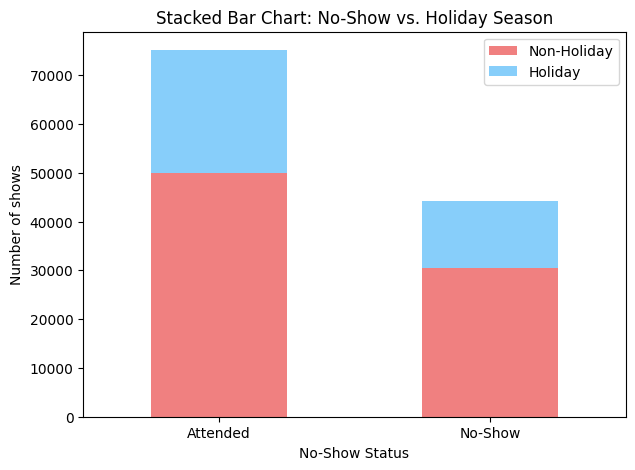

In [59]:
# Ensure 'is_holiday_season_in_country' and 'no_show' are numeric
data['is_holiday_season_in_country'] = pd.to_numeric(data['is_holiday_season_in_country'], errors='coerce')
data['no_show'] = pd.to_numeric(data['no_show'], errors='coerce')

# Drop NaN values if conversion failed
data = data.dropna(subset=['is_holiday_season_in_country', 'no_show'])

# Group by no-show status and holiday season
no_show_counts = data.groupby(['no_show', 'is_holiday_season_in_country']).size().unstack(fill_value=0)

# Rename columns for clarity
no_show_counts.columns = ['Non-Holiday', 'Holiday']

# Plot stacked bar chart
ax = no_show_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(7, 5))

# Set labels and title
plt.xticks(ticks=[0, 1], labels=['Attended', 'No-Show'], rotation=0)
plt.xlabel("No-Show Status")
plt.ylabel("Number of shows")
plt.title("Stacked Bar Chart: No-Show vs. Holiday Season")
plt.legend(["Non-Holiday", "Holiday"], loc='upper right')

# Show the plot
plt.show()

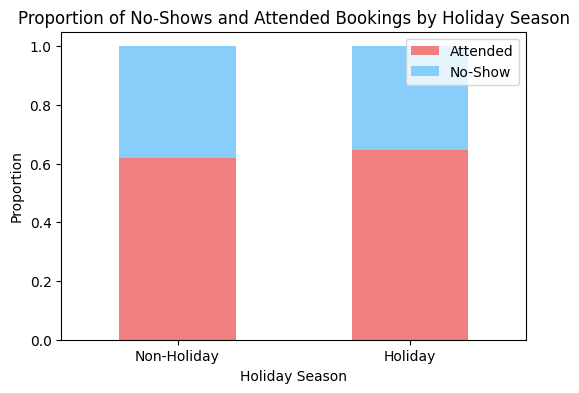

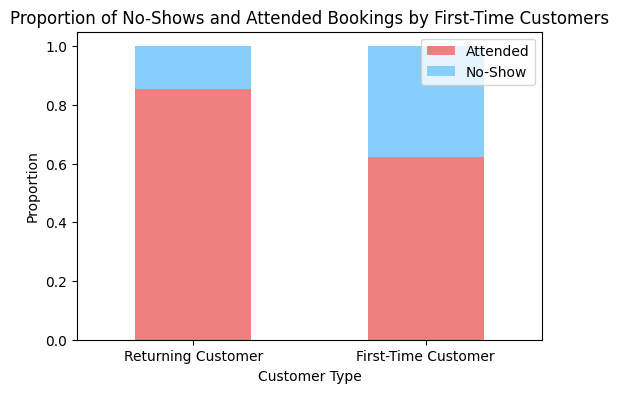

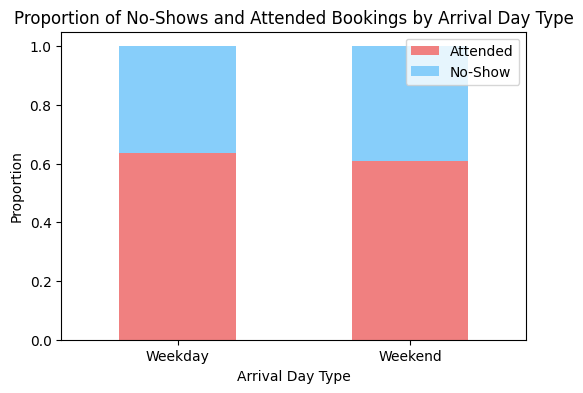

Chi-Square Statistic: 75.8093, p-value: 0.0000
Point-Biserial Correlation: -0.0252, p-value: 0.0000


In [60]:
# Ensure data columns are numeric
data['is_holiday_season_in_country'] = pd.to_numeric(data['is_holiday_season_in_country'], errors='coerce')
data['no_show'] = pd.to_numeric(data['no_show'], errors='coerce')
data['first_time'] = pd.to_numeric(data['first_time'], errors='coerce')
data['arrival_day_type'] = pd.to_numeric(data['arrival_day_type'], errors='coerce')

# Drop NaN values if conversion failed
data = data.dropna(subset=['is_holiday_season_in_country', 'no_show', 'first_time', 'arrival_day_type'])

# Stacked Bar Chart: Proportion of No-Shows and Attended Bookings by Holiday Season
holiday_counts = data.groupby(['is_holiday_season_in_country', 'no_show']).size().unstack()
holiday_counts_norm = holiday_counts.div(holiday_counts.sum(axis=1), axis=0)

holiday_counts_norm.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(6, 4))
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.xlabel("Holiday Season")
plt.ylabel("Proportion")
plt.title("Proportion of No-Shows and Attended Bookings by Holiday Season")
plt.legend(["Attended", "No-Show"], loc='upper right')
plt.show()

# Stacked Bar Chart: First-Time Customer vs. No-Show
first_time_counts = data.groupby(['first_time', 'no_show']).size().unstack()
first_time_counts_norm = first_time_counts.div(first_time_counts.sum(axis=1), axis=0)

first_time_counts_norm.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(6, 4))
plt.xticks([0, 1], ['Returning Customer', 'First-Time Customer'], rotation=0)
plt.xlabel("Customer Type")
plt.ylabel("Proportion")
plt.title("Proportion of No-Shows and Attended Bookings by First-Time Customers")
plt.legend(["Attended", "No-Show"], loc='upper right')
plt.show()

# Stacked Bar Chart: Arrival Day Type vs. No-Show
arrival_day_counts = data.groupby(['arrival_day_type', 'no_show']).size().unstack()
arrival_day_counts_norm = arrival_day_counts.div(arrival_day_counts.sum(axis=1), axis=0)

arrival_day_counts_norm.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'], figsize=(6, 4))
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.xlabel("Arrival Day Type")
plt.ylabel("Proportion")
plt.title("Proportion of No-Shows and Attended Bookings by Arrival Day Type")
plt.legend(["Attended", "No-Show"], loc='upper right')
plt.show()

# Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(holiday_counts)
print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

# Point-Biserial Correlation
r_pb, p_pb = stats.pointbiserialr(data['is_holiday_season_in_country'], data['no_show'])
print(f"Point-Biserial Correlation: {r_pb:.4f}, p-value: {p_pb:.4f}")

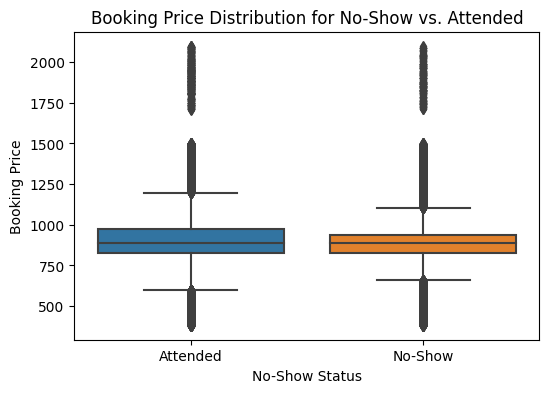

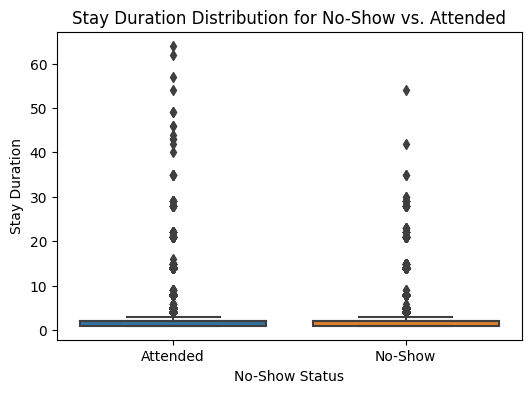

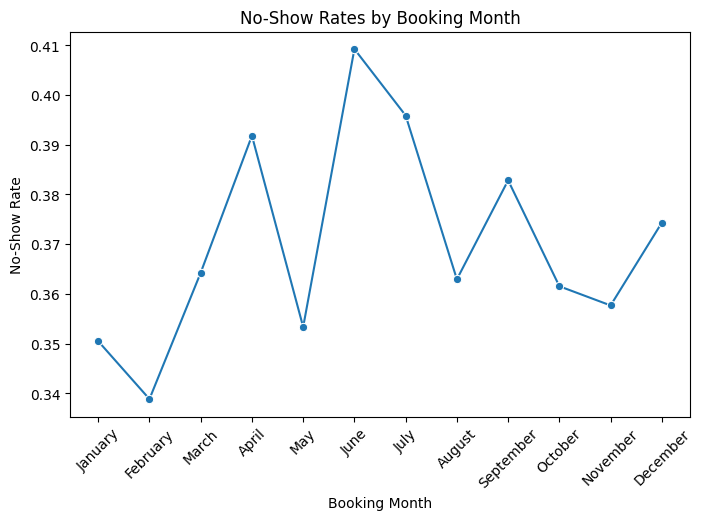

In [61]:
import calendar

# Boxplot: Price vs. No-Show
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['no_show'], y=data['price'])
plt.xticks([0, 1], ['Attended', 'No-Show'])
plt.xlabel("No-Show Status")
plt.ylabel("Booking Price")
plt.title("Booking Price Distribution for No-Show vs. Attended")
plt.show()

# Boxplot: Stay Duration vs. No-Show
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['no_show'], y=data['stay_duration'])
plt.xticks([0, 1], ['Attended', 'No-Show'])
plt.xlabel("No-Show Status")
plt.ylabel("Stay Duration")
plt.title("Stay Duration Distribution for No-Show vs. Attended")
plt.show()

# Line Chart: No-Show Rate by Booking Month
data['booking_month_name'] = data['booking_month'].apply(lambda x: calendar.month_name[int(x)])

# Group by month name and calculate no-show rate
monthly_no_show = data.groupby('booking_month_name')['no_show'].mean()

# Ensure months are in the correct order
month_order = list(calendar.month_name[1:])  # Excludes empty string at index 0
monthly_no_show = monthly_no_show.reindex(month_order)

# Plot No-Show Rate by Booking Month (with Month Names)
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_no_show.index, y=monthly_no_show.values, marker='o')
plt.xlabel("Booking Month")
plt.ylabel("No-Show Rate")
plt.title("No-Show Rates by Booking Month")
plt.xticks(rotation=45)
plt.show()

#### OUTLIER DETECTION

In [62]:
# # to do1 and investigate more. 

# import pandas as pd
# import numpy as np
# from scipy.stats import zscore
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function for Z-Score Outlier Detection
# def detect_outliers_zscore(data, column, threshold=3):
#     data[f'z_{column}'] = zscore(data[column])
#     outliers = data[(data[f'z_{column}'] > threshold) | (data[f'z_{column}'] < -threshold)]
#     print(f"\nZ-Score Outliers in {column} (Threshold={threshold}): {len(outliers)}")
#     print(outliers[[column, f'z_{column}']])
#     return outliers

# # Function for IQR Outlier Detection
# def detect_outliers_iqr(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#     print(f"\nIQR Outliers in {column}: {len(outliers)}")
#     print(outliers[[column]])
#     return outliers

# # Apply Outlier Detection Methods to All Numerical Columns
# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# print("numberical column")
# print(numerical_columns)
# print()
# for col in numerical_columns:
#     print(f"\nProcessing Column: {col}")
#     z_outliers = detect_outliers_zscore(data, col)  # Z-Score Method
#     iqr_outliers = detect_outliers_iqr(data, col)  # IQR Method

#     # Visualize outliers with a boxplot
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(data=data, x=col, color='skyblue')
#     plt.title(f'Outlier Detection for {col}')
#     plt.xlabel(col.capitalize())
#     plt.show()
    


In [63]:
# to do 2
# # Outlier Detection:

# example of stat method
# from scipy.stats import zscore
# data['z_score'] = zscore(data['numeric_column'])
# data = data[data['z_score'].abs() < 3]  # Keep data within 3 standard deviations

# #IQR
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# outliers = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]

from scipy.stats import zscore

# Select numerical columns
numerical_columns = ['price', 'num_adults', 'num_children']

# Process each numerical column
for col in numerical_columns:
    # Convert to numeric and handle non-numeric values
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    
    # Handle missing values
    data[col].fillna(data[col].mean(), inplace=True)  # Replace NaNs with the mean of the column

    # Calculate Z-scores
    data[f'z_{col}'] = zscore(data[col])  # Compute Z-scores

    # Find outliers
    outliers = data[(data[f'z_{col}'] > 3) | (data[f'z_{col}'] < -3)]  # Z-scores beyond 3 or -3
    print(f"Outliers in {col}:")
    print(outliers[[col, f'z_{col}']])
    
# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    return outliers

# Apply the function to numerical columns
for col in numerical_columns:
    detect_outliers_iqr(col)

Outliers in price:
         price   z_price
20      1725.0  3.478838
145     1736.0  3.526225
248     2003.0  4.676440
250     2059.0  4.917684
656     2036.0  4.818602
...        ...       ...
117426  1820.0  3.888091
117583  1740.0  3.543457
117831  1811.0  3.849319
117865  2050.0  4.878912
117964  1856.0  4.043176

[711 rows x 2 columns]
Outliers in num_adults:
Empty DataFrame
Columns: [num_adults, z_num_adults]
Index: []
Outliers in num_children:
Empty DataFrame
Columns: [num_children, z_num_children]
Index: []
Outliers in price:
         price
0        493.0
1       1351.0
5       1500.0
6       1375.0
9       1252.0
...        ...
119361  1161.0
119371   420.0
119378  1331.0
119381   432.0
119387  1354.0

[30851 rows x 1 columns]
Outliers in num_adults:
Empty DataFrame
Columns: [num_adults]
Index: []
Outliers in num_children:
        num_children
557              3.0
1885             3.0
2460             3.0
2562             3.0
3359             3.0
...              ...
116406   

In [64]:
print(data.head(5))

   no_show   branch  booking_month  arrival_month arrival_day  checkout_month  \
0      0.0   Changi             11              6        25.0               6   
1      0.0  Orchard              8             11        28.0              11   
2      0.0   Changi              3              2         7.0               2   
3      1.0  Orchard              9             10         1.0              10   
4      0.0  Orchard              3              6        20.0               6   

  checkout_day    country  first_time    room  ...  stay_duration  \
0         27.0  Singapore           1  Single  ...              2   
1         29.0  Indonesia           1    King  ...              1   
2         11.0      India           1  Single  ...              4   
3          3.0      China           1  Single  ...              2   
4         24.0  Australia           1   Queen  ...              4   

  is_holiday_season_in_country  is_king_room  is_queen_room is_single_room  \
0                   

# Feature engineering section

## Handle missing value [done]

## Binning [not done]:Group continuous variables into bins to simplify relationships or reduce noise.
#Create bins for price
bins = [0, 200, 500, 1000, 5000]
labels = ['Low', 'Medium', 'High', 'Very High']
data['price_bin'] = pd.cut(data['price'], bins=bins, labels=labels)



## Encoding categorical variable [not done] (labe lencoding, one-hot encoding):Machine learning models require numerical inputs.
#One-Hot Encoding:: Assign unique integers to each category.
data = pd.get_dummies(data, columns=['branch', 'platform'], drop_first=True)

#Label Encoding:Create binary (0/1) columns for each category.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['room_encoded'] = le.fit_transform(data['room'])


## Interaction features [not done]:Combining features can reveal relationships that individual features may not capture.
data['total_people'] = data['num_adults'] + data['num_children']

## scaling and normalization:Features on different scales (e.g., price vs. num_adults) can mislead models.
#z-scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


## feature transformation: Nonlinear relationships can be addressed by transforming features.
###Log transformation
data['log_price'] = np.log1p(data['price'])

###Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['price', 'num_adults']])


## Target encoding
target_means = data.groupby('room')['no_show'].mean()
data['room_encoded'] = data['room'].map(target_means)

In [65]:
# #encoding categorical variable [label encoding / one-hot]

# # Use One-Hot Encoding for categorical features like branch, platform, room, etc.
# # Use Label Encoding if the categories are ordinal (e.g., first_time).

# from sklearn.preprocessing import LabelEncoder

# # Label Encoding for room and first_time
# le = LabelEncoder()
# data['room'] = le.fit_transform(data['room'])  # Encode room (e.g., Single -> 0)
# data['first_time'] = data['first_time'].map({'Yes': 1, 'No': 0})  # Encode first_time (Yes -> 1)

# # One-Hot Encoding for categorical columns
# data = pd.get_dummies(data, columns=['branch', 'platform', 'country'], drop_first=True)



In [66]:
# Z-score outlier removal for 'price'
# from scipy.stats import zscore
# data['z_price'] = zscore(data['price'])
# data = data[(data['z_price'].abs() < 3)]

In [67]:
# # Intearction feature
# data['length_of_stay'] = data['checkout_day'] - data['arrival_day']

# # Feature engineering
# data['peak_season'] = data['arrival_month'].apply(lambda x: 1 if x in ['june', 'july', 'august'] else 0)

# # Create total people feature
# data['total_people'] = data['num_adults'] + data['num_children']

# # Example: Convert months to numeric
# month_map = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'jun	e': 6,
#              'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}
# data['booking_month'] = data['booking_month'].map(month_map)
# data['arrival_month'] = data['arrival_month'].map(month_map)



In [68]:
# #scaling and normalization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data[['price', 'total_people']] = scaler.fit_transform(data[['price', 'total_people']])

In [69]:
# # Feature transformation
# # standardization (Z-Score Scaling)/ Min-Max Scaling

# print(data)

To REVIEw

# Encode Categorical Features:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

'''# Example columns to encode
categorical_columns = ['branch', 'platform', 'room']

# One-Hot Encoding for nominal variables
data = pd.get_dummies(data, columns=categorical_columns)

# Label Encoding for ordinal variables
# Example: If you have ordinal data like `Low`, `Medium`, `High`
label_encoder = LabelEncoder()
data['booking_month'] = label_encoder.fit_transform(data['booking_month'])
'''

#encoding 2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['price', 'arrival_day', 'checkout_day']] = scaler.fit_transform(data[['price', 'arrival_day', 'checkout_day']])

label_encoder = LabelEncoder()

# Encoding Categorical Columns
# Encode month columns
data['booking_month'] = label_encoder.fit_transform(data['booking_month'])
data['arrival_month'] = label_encoder.fit_transform(data['arrival_month'])
data['checkout_month'] = label_encoder.fit_transform(data['checkout_month'])

#if requried
# data = pd.get_dummies(data, columns=['country'], drop_first=True)  # One-hot encoding


In [70]:
# # to do for binary classification~

# # train split
# from sklearn.model_selection import train_test_split

# # X = data.drop(columns=['no_show', 'booking_id'])  # Features
# y = data['no_show']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #EDA



# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix



# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))



MODEL


In [ ]:
import os
print(os.getcwd())


from google.colab import drive
drive.mount('/content/drive')  # Mounts Drive if not already



In [ ]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

SEED=42

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score

pd.set_option('display.float_format', '{:.2f}'.format)


In [ ]:

# Ensure the correct folder is added to Python's path
setup_dir = "/content/drive/MyDrive/HotelNoShowPrediction/task_2/src/setup"
sys.path.insert(0, setup_dir)  # Use insert(0) to prioritize this path

# Debug: Print available modules in the setup folder
print("Files in setup dir:", os.listdir(setup_dir))

# Try importing setup directly
try:
    import setup  # Import the setup.py file as a module
    print("✅ Import successful!")
except Exception as e:
    print("❌ Import failed:", e)

import importlib

importlib.reload(setup)  # Reload the module to reflect new changes


from setup import setup_stage  # Directly import function

(
    db_path,
    target_col,
    num_map_dict,
    standard_list,
    one_hot_list,
    model_test_size,
    model_random_state,
    model_search_method,
    model_cv_num,
    model_scoring,
    model_num_iter,
    model_num_jobs,
    model_param_dict,
) = setup.setup_stage()
	

In [ ]:

# import EDA.eda_step as EDA
# import model_select.model_select as model_select
# import model_eval.model_eval as model_eval

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from typing import Dict
from tqdm import tqdm

In [ ]:
# # Load configuration and setup parameters
# start_time = time.time()


# (
#     db_path,
#     target_col,
#     num_map_dict,
#     standard_list,
#     one_hot_list,
#     model_test_size,
#     model_random_state,
#     model_search_method,
#     model_cv_num,
#     model_scoring,
#     model_num_iter,
#     model_num_jobs,
#     model_param_dict,
# ) = setup.setup_stage()

# print("Configuration loaded successfully!")

In [ ]:
# # Using analysis from task_1 EDA, perform data preprocessing, feature data standardization and one-hot encoding
# print("3. Performing EDA on DataFrame...")

# fil_noshow_data_df, preprocessor, X_train, X_test, Y_train, Y_test = EDA.ml_eda_step(
#     noshow_data_df,
#     target_col,
#     num_map_dict,
#     standard_list,
#     one_hot_list,
#     model_test_size,
#     model_random_state,
# )

# print("EDA done!")

In [ ]:
# Logistic Regression 2 - Optuna with Automated Timeout Calculation & Model Saving

import time
import joblib
import optuna
import shutil
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Train Logistic Regression using Optuna
if "Logistic Regression" in model_param_dict:
    model_start_time = time.time()
    print("Processing Logistic Regression with Optuna Optimization...")

    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""
        C = trial.suggest_loguniform("C", 1e-3, 1e3)  # Regularization strength
        solver = trial.suggest_categorical("solver", ["liblinear", "lbfgs", "saga"])
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "lbfgs" else "l2"

        model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=model_random_state)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Maximize accuracy

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({"C": 1.0, "solver": "liblinear", "penalty": "l2"}))  # Dummy params
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 30
    n_jobs = 4  # Adjust based on available CPU cores

    # Step 2: Compute optimal timeout
    optimal_timeout = (avg_trial_time * target_trials) / n_jobs
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best parameters
    best_params = study.best_params
    print("Best Hyperparameters for Logistic Regression:", best_params)

    # Train final model with best parameters
    best_model = LogisticRegression(**best_params, random_state=model_random_state)
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])
    pipeline.fit(X_train, Y_train)

    # Save best model
    best_estimators_dict["Logistic Regression"] = pipeline
    model_filename = "Logistic_Regression_optuna_v2.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Optimized Logistic Regression model saved as {model_filename}")

    # Move the model to the specified directory
    destination_file = os.path.join(destination_dir, model_filename)
    shutil.move(model_filename, destination_file)
    print(f"Model moved to: {destination_file}")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"Logistic Regression Optuna tuning completed in {model_duration:.3f} {model_tag}")

In [ ]:
# Random
import time
import joblib
import optuna
import shutil
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Train Random Forest using Optuna
if "Random Forest" in model_param_dict:
    model_start_time = time.time()
    print("Processing Random Forest with Optuna Optimization...")

    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""
        # Suggest hyperparameters dynamically
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 30, step=3)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

        # Initialize Random Forest
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=model_random_state,
            n_jobs=model_num_jobs
        )

        # Create pipeline with preprocessor and model
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        # Measure trial time
        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Optuna optimizes for highest score

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({
                "n_estimators": 100, "max_depth": 10,
                "min_samples_split": 2, "min_samples_leaf": 1,
                "max_features": "sqrt"
            }))  # Dummy params
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 50
    n_jobs = model_num_jobs  # Use defined number of parallel jobs

    # Step 2: Compute optimal timeout
    # optimal_timeout = (avg_trial_time * target_trials) / n_jobs
    optimal_timeout = max((avg_trial_time * target_trials) / max(n_jobs, 1), 30)
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best parameters
    best_params = study.best_params
    print("Best Hyperparameters for Random Forest:", best_params)

    # Train final model with best parameters
    best_model = RandomForestClassifier(**best_params, random_state=model_random_state, n_jobs=model_num_jobs)
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])
    pipeline.fit(X_train, Y_train)

    # Save best model
    best_estimators_dict["Random Forest"] = pipeline
    model_filename = "Random_Forest_Optuna_V2.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Optimized Random Forest model saved as {model_filename}")

    # Move the model to the specified directory
    destination_file = os.path.join(destination_dir, model_filename)
    shutil.move(model_filename, destination_file)
    print(f"Model moved to: {destination_file}")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"Random Forest Optuna tuning completed in {model_duration:.3f} {model_tag}")

In [ ]:
## GRID SEARCH
import time
import joblib
import optuna
import shutil
import os
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Train Logistic Regression using Optuna + GridSearch
if "Logistic Regression" in model_param_dict:
    model_start_time = time.time()
    print("Processing Logistic Regression with Optuna Optimization & GridSearch...")

    # Define Optuna objective function
    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""
        C = trial.suggest_loguniform("C", 1e-3, 1e3)
        solver = trial.suggest_categorical("solver", ["liblinear", "lbfgs", "saga"])
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "lbfgs" else "l2"

        model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=model_random_state)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        # Measure trial time
        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Optuna optimizes for highest accuracy

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({
                "C": 1.0, "solver": "liblinear", "penalty": "l2"
            }))  # Dummy params
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 30
    n_jobs = max(model_num_jobs, 1)  # Prevent division by zero

    # Step 2: Compute optimal timeout
    optimal_timeout = max((avg_trial_time * target_trials) / n_jobs, 30)  # Ensure timeout is positive
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best hyperparameters from Optuna
    best_params_optuna = study.best_params if len(study.trials) > 0 else None

    if best_params_optuna:
        print("Best Optuna Hyperparameters for Logistic Regression:", best_params_optuna)

        # Define model with Optuna best parameters
        best_model = LogisticRegression(**best_params_optuna, random_state=model_random_state)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])

        # **GRID SEARCH with Optuna Best Parameters**
        search = GridSearchCV(
            pipeline,
            param_grid=model_param_dict["Logistic Regression"],
            cv=model_cv_num,
            scoring=model_scoring,
            n_jobs=model_num_jobs,
            verbose=3
        )

        # Progress tracking
        with tqdm(total=100, desc="GridSearch Progress", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
            search.fit(X_train, Y_train)
            pbar.update(100)

        # Save best model
        best_estimators_dict["Logistic Regression"] = search.best_estimator_
        print("Best parameters for Logistic Regression (GridSearch):", search.best_params_)

        # Save the trained model
        model_filename = "Logistic_Regression_Optuna_Grid_V2.pkl"
        joblib.dump(search.best_estimator_, model_filename)
        print(f"Model saved as {model_filename}")

        # Move the model to the specified directory
        destination_file = os.path.join(destination_dir, model_filename)
        shutil.move(model_filename, destination_file)
        print(f"Model moved to: {destination_file}")

    else:
        print("Optuna did not complete any successful trials. Skipping GridSearch.")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"Logistic Regression tuning completed in {model_duration:.3f} {model_tag}")


In [ ]:
## Revision of the above
import time
import joblib
import optuna
import shutil
import os
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Map friendly labels (strings) to actual tuples
HIDDEN_LAYER_MAP = {
    "50": (50,),
    "100": (100,),
    "50-50": (50, 50),
    "100-100": (100, 100)
}

# Train MLP using Optuna
if "MLP" in model_param_dict:
    model_start_time = time.time()
    print("Processing MLP with Optuna Optimization...")

    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""

        # 1) Suggest hidden_layer_sizes as string label
        hidden_str = trial.suggest_categorical("hidden_layer_sizes", ["50", "100", "50-50", "100-100"])
        hidden_layer_sizes = HIDDEN_LAYER_MAP[hidden_str]  # Convert label to tuple

        # 2) Suggest activation and solver
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
        solver = trial.suggest_categorical("solver", ["adam", "sgd"])

        # 3) Use `suggest_float(..., log=True)` for alpha & learning_rate_init
        alpha = trial.suggest_float("alpha", 1e-4, 1e-1, log=True)
        learning_rate_init = trial.suggest_float("learning_rate_init", 1e-4, 1e-2, log=True)

        # 4) Optionally increase max_iter to reduce ConvergenceWarning
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate_init=learning_rate_init,
            max_iter=300,  # Increased from 200 to 300
            random_state=model_random_state
        )

        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        # Measure trial time
        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Maximizing accuracy

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({
                "hidden_layer_sizes": "100",   # or any valid label
                "activation": "relu",
                "solver": "adam",
                "alpha": 1e-4,
                "learning_rate_init": 1e-3
            }))
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 30
    n_jobs = 4  # Adjust based on available CPU cores

    # Step 2: Compute optimal timeout
    optimal_timeout = (avg_trial_time * target_trials) / n_jobs
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best parameters
    best_params = study.best_params
    print("Best Hyperparameters for MLP:", best_params)

    # Convert best_params hidden_layer_sizes from string to tuple
    best_params["hidden_layer_sizes"] = HIDDEN_LAYER_MAP[best_params["hidden_layer_sizes"]]

    # Train final model with best parameters
    # Increase max_iter further if needed
    best_model = MLPClassifier(**best_params, max_iter=500, random_state=model_random_state)
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])
    pipeline.fit(X_train, Y_train)

    # Save best model
    best_estimators_dict["MLP"] = pipeline
    model_filename = "MLP_Optuna_V2.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Optimized MLP model saved as {model_filename}")

    # Move the model to the specified directory
    destination_file = os.path.join(destination_dir, model_filename)
    shutil.move(model_filename, destination_file)
    print(f"Model moved to: {destination_file}")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"MLP Optuna tuning completed in {model_duration:.3f} {model_tag}")


In [ ]:
import time
import joblib
import optuna
import shutil
import os
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Train Naive Bayes using Optuna + Grid/Random Search
if "Naive Bayes" in model_param_dict:
    model_start_time = time.time()
    print("Processing Naive Bayes with Optuna Optimization & Grid/Random Search...")

    # Define Optuna objective function
    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""
        alpha = trial.suggest_loguniform("alpha", 1e-3, 1.0)
        binarize = trial.suggest_loguniform("binarize", 1e-3, 1.0)

        model = BernoulliNB(alpha=alpha, binarize=binarize)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        # Measure trial time
        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Optuna optimizes for highest accuracy

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({
                "alpha": 0.1,
                "binarize": 0.5
            }))  # Dummy params
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 30
    n_jobs = max(model_num_jobs, 1)  # Prevent division by zero

    # Step 2: Compute optimal timeout
    optimal_timeout = max((avg_trial_time * target_trials) / n_jobs, 30)  # Ensure timeout is positive
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best hyperparameters from Optuna
    best_params_optuna = study.best_params if len(study.trials) > 0 else None

    if best_params_optuna:
        print("Best Optuna Hyperparameters for Naive Bayes:", best_params_optuna)

        # Define model with Optuna best parameters
        best_model = BernoulliNB(**best_params_optuna)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])

        # **GRID or RANDOM SEARCH with Optuna Best Parameters**
        if model_search_method == "grid":
            search = GridSearchCV(
                pipeline,
                param_grid=model_param_dict["Naive Bayes"],
                cv=model_cv_num,
                scoring=model_scoring,
                n_jobs=model_num_jobs,
                verbose=3
            )
        elif model_search_method == "random":
            search = RandomizedSearchCV(
                pipeline,
                param_distributions=model_param_dict["Naive Bayes"],
                n_iter=model_num_iter,
                cv=model_cv_num,
                scoring=model_scoring,
                random_state=model_random_state,
                n_jobs=model_num_jobs,
            )

        # Progress tracking
        with tqdm(total=100, desc="GridSearch Progress", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
            search.fit(X_train, Y_train)
            pbar.update(100)

        # Save best model
        best_estimators_dict["Naive Bayes"] = search.best_estimator_
        print("Best parameters for Naive Bayes (Grid/Random Search):", search.best_params_)

        # Save the trained model
        model_filename = "Naive_Bayes_Optuna_Grid_V2.pkl"
        joblib.dump(search.best_estimator_, model_filename)
        print(f"Model saved as {model_filename}")

        # Move the model to the specified directory
        destination_file = os.path.join(destination_dir, model_filename)
        shutil.move(model_filename, destination_file)
        print(f"Model moved to: {destination_file}")

    else:
        print("Optuna did not complete any successful trials. Skipping GridSearch.")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"Naive Bayes tuning completed in {model_duration:.3f} {model_tag}")

In [ ]:
import time
import joblib
import optuna
import shutil
import os
from tqdm import tqdm
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Directory to save the model
destination_dir = "/content/drive/MyDrive/HotelNoShowPrediction"
os.makedirs(destination_dir, exist_ok=True)  # Ensure the directory exists

# Train XGBoost using Optuna
if "XG Boost" in model_param_dict:
    model_start_time = time.time()
    print("Processing XGBoost with Optuna Optimization...")

    def objective(trial):
        """Objective function for Optuna Bayesian Optimization"""
        param = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 15, step=2),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_loguniform("gamma", 1e-3, 1),
            "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 1),
            "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 1),
        }

        model = XGBClassifier(objective="reg:squarederror", random_state=model_random_state, **param)
        pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        # Measure trial time
        start_time = time.time()
        score = cross_val_score(pipeline, X_train, Y_train, cv=model_cv_num, scoring=model_scoring).mean()
        trial_time = time.time() - start_time

        print(f"Trial {trial.number} took {trial_time:.2f} seconds")
        return score  # Maximizing accuracy

    # Step 1: Estimate time per trial using a few test runs
    def estimate_trial_time(objective, n_test_trials=3):
        """Runs a few dummy trials to estimate average trial time."""
        start_time = time.time()
        for _ in range(n_test_trials):
            objective(optuna.trial.FixedTrial({
                "n_estimators": 200,
                "max_depth": 6,
                "learning_rate": 0.1,
                "subsample": 0.8,
                "colsample_bytree": 0.8,
                "gamma": 0.01,
                "reg_alpha": 0.01,
                "reg_lambda": 0.01
            }))  # Dummy params
        return (time.time() - start_time) / n_test_trials

    avg_trial_time = estimate_trial_time(objective)
    target_trials = 30
    n_jobs = 4  # Adjust based on available CPU cores

    # Step 2: Compute optimal timeout
    optimal_timeout = (avg_trial_time * target_trials) / n_jobs
    print(f"Estimated optimal timeout: {optimal_timeout:.2f} seconds (~{optimal_timeout/60:.2f} minutes)")

    # Run Optuna optimization with dynamic timeout
    study = optuna.create_study(direction="maximize")

    with tqdm(total=target_trials, desc="Progress", bar_format="{l_bar}{bar} [ Time Left: {remaining} ]") as pbar:
        def callback(study, trial):
            pbar.update(1)  # Update progress bar per trial

        study.optimize(objective, n_trials=target_trials, timeout=optimal_timeout, callbacks=[callback])

    # Get best parameters
    best_params = study.best_params
    print("Best Hyperparameters for XGBoost:", best_params)

    # Train final model with best parameters
    best_model = XGBClassifier(objective="reg:squarederror", random_state=model_random_state, **best_params)
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", best_model)])
    pipeline.fit(X_train, Y_train)

    # Save best model
    best_estimators_dict["XG Boost"] = pipeline
    model_filename = "XGBoost_Optuna_V2.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Optimized XGBoost model saved as {model_filename}")

    # Move the model to the specified directory
    destination_file = os.path.join(destination_dir, model_filename)
    shutil.move(model_filename, destination_file)
    print(f"Model moved to: {destination_file}")

    # Log training duration
    model_end_time = time.time()
    model_total_time = model_end_time - model_start_time
    model_duration, model_tag = duration_cal.duration_cal(model_total_time)
    print(f"XGBoost Optuna tuning completed in {model_duration:.3f} {model_tag}")

In [ ]:
import time
import joblib

# -----------------------------
# 1) Necessary Imports
# -----------------------------
import cudf
from cuml.ensemble import RandomForestClassifier as cuRF

# scikit-learn imports
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# -----------------------------
# 2) Custom Wrapper Class
# -----------------------------
class CuMLRandomForestWrapper(BaseEstimator, ClassifierMixin):
    """
    A scikit-learn-compatible wrapper for cuML's RandomForestClassifier.
    This wrapper:
      - Accepts CPU-based data (NumPy/pandas) in fit/predict
      - Converts data to cuDF
      - Trains/predicts using cuML's RandomForestClassifier on GPU
      - Optionally converts predictions back to CPU-based NumPy
    """
    def __init__(self,
                 random_state=42,
                 n_estimators=100,
                 max_depth=None,
                 max_features=1.0):
        self.random_state = random_state
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.model_ = None

    def fit(self, X, y):
        # Convert to cuDF
        X_cudf = cudf.DataFrame(X)
        y_cudf = cudf.Series(y)

        # Instantiate and fit the GPU model
        self.model_ = cuRF(
            random_state=self.random_state,
            n_estimators=self.n_estimators,
            max_depth=self.max_depth,
            max_features=self.max_features
        )
        self.model_.fit(X_cudf, y_cudf)
        return self

    def predict(self, X):
        X_cudf = cudf.DataFrame(X)
        y_pred_cudf = self.model_.predict(X_cudf)
        # Convert predictions back to CPU numpy
        return y_pred_cudf.to_numpy()

    def predict_proba(self, X):
        X_cudf = cudf.DataFrame(X)
        y_proba_cudf = self.model_.predict_proba(X_cudf)
        return y_proba_cudf.to_numpy()

    # Let GridSearchCV set/get hyperparameters
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def get_params(self, deep=True):
        return {
            "random_state": self.random_state,
            "n_estimators": self.n_estimators,
            "max_depth": self.max_depth,
            "max_features": self.max_features,
        }


# -----------------------------
# 3) Your Dataset
# -----------------------------
# We assume you already have:
#   X_train, X_test, y_train, y_test
# as pandas DataFrames/Series (or NumPy arrays).
#
# Example:
# X_train, y_train = ...
# X_test, y_test   = ...

# -----------------------------
# 4) Define a CPU Preprocessor & Pipeline
# -----------------------------
preprocessor = StandardScaler()  # Example CPU-based scaler

gpu_rf_estimator = CuMLRandomForestWrapper(random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("gpu_model", gpu_rf_estimator)
])


# -----------------------------
# 5) Hyperparameter Tuning Setup
# -----------------------------
param_grid = {
    "gpu_model__n_estimators": [50, 100],
    "gpu_model__max_depth": [8, 12],
    "gpu_model__max_features": [0.5, 1.0],
}

search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,               # number of CV folds
    scoring="accuracy", # or another metric
    verbose=3
)


# -----------------------------
# 6) Run Training & Tuning
# -----------------------------
model_start_time = time.time()

search.fit(X_train, Y_train)  # <= CPU data goes in, wrapper handles GPU conversion

model_end_time = time.time()
model_total_time = model_end_time - model_start_time

# Print results
print("Best parameters:", search.best_params_)
print(f"Best CV score: {search.best_score_:.4f}")
print(f"Total tuning time: {model_total_time:.2f} seconds")


# -----------------------------
# 7) Save the Best Model
# -----------------------------
best_pipeline = search.best_estimator_
model_filename = "GPU_RandomForestWrapper.pkl"
joblib.dump(best_pipeline, model_filename)
print(f"Model saved as {model_filename}")


# -----------------------------
# 8) Evaluate on Test Data
# -----------------------------
test_acc = best_pipeline.score(X_test, Y_test)
print(f"Test Accuracy on X_test: {test_acc:.4f}")